# Multivariate Calculus

In this lesson I'll finally go back to calculus after a long detour into linear algebra. I'll talk about the calculus of multivariate functions. While it may seem odd to do so much linear algebra in between the calculus lessons, there's a good reason for it. In some sense multivariate calculus is a marriage of both ordinary univariate calculus and linear algebra. Let's get started.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from utils.math_ml import *

## Partial Differentials

In univariate calculus we were interested in functions of the form $y=f(x)$, where $y$ is a single output that depends continuously on a single input $x$. We can extend differentiation to higher dimensions as well. To keep things simple, let's start with *bivariate* functions of the form $z = f(x,y)$. The output $z$ will now depend continuously on *two* input variables $x$ and $y$. 

Recall the graph of a bivariate function is a two-dimensional surface. For example, here's a plot of the function

$$z = x^2 + y^2.$$

The graph of this function is an upward-facing bowl centered at the origin $(0,0,0)$.

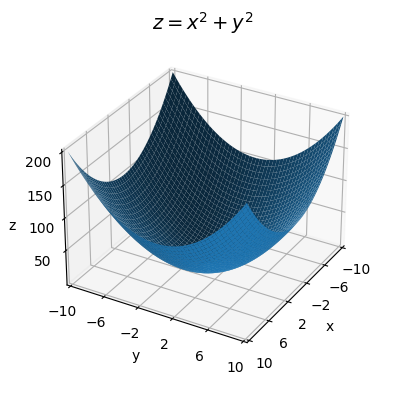

In [2]:
#| fig-align: center
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
f = lambda x, y: x**2 + y**2

plot_function_3d(x, y, f, title='$z=x^2+y^2$', titlepad=10, labelpad=5, ticks_every=[4, 4, 50], dist=12,
                 figsize=(6, 5))

Suppose we have some bivariate function $z=f(x,y)$. We ultimately want to figure out how does a small change in both inputs create small changes in the output. It's simpler to start with the case where we only change one input at a time, while imagining the other one is constant.

Let's start by pretending $y$ is constant and only $x$ is allowed to vary. Then for all practical purposes $z$ is a function of $x$ alone. To make this easier to visualize I'll write $z = f(x, \color{red}{y}\color{black})$ to represent this idea. Variables in black will be allowed to vary, and variables in red are assumed to be held constant.

Let me also go ahead and introduce the notion of a **partial differential**. In situations where we're only varying one input variable while holding the rest fixed, it's common to use a special notation for the differentials. Instead of writing $dz$ for the differential of $z$, we'd write $\partial z$ (pronounced "partial z") to make it clear we're only varying one input. If the input we're varying is $x$, we might write $\partial_x z$ to make this extra clear. If we're varying $y$, we'd write $\partial_y z$. Since the input differentials $dx$ and $dy$ don't depend on anything we can denote them either way. That is, $\partial x = dx$ and $\partial y = dy$.

Now, suppose we change $x$ by some infinitesimal amount $\partial x$. Then $z$ will change by an amount 

$$\partial_x z = f(x + \partial x, \color{red}{y}\color{black}) - f(x, \color{red}{y}\color{black}).$$

Remember, $z=f(x, \color{red}{y}\color{black})$ is a univariate function of $x$ alone. As long as you've got that clear in your mind, it's okay to write the function as $z=f(x, y)$ and mentally remember $y$ is fixed. Dividing both sides by $\partial x$ gives some kind of derivative, which we call the **partial derivative** with respect to $x$,

$$\frac{\partial z}{\partial x} = \frac{f(x+\partial x, \color{red}{y}\color{black}) - f(x, \color{red}{y}\color{black})}{\partial x}.$$

When writing the partial derivative, we tend to lazily write $\partial z$ instead of $\partial_x z$ since the denominator makes it clear what we're varying. Just as with the ordinary derivative, the partial derivative says how much the output will vary in response to small changes in the input, except with the caveat that we're only varying $x$ and keeping $y$ fixed.

We can of course do exactly the same thing with the variables reversed, varying $y$ and fixing $x$. In that case, we'd have $z = f(\color{red}{x}\color{black}, y)$. If we change $y$ by an infinitesimal amount $\partial y$, then $z$ changes by an amount

$$\partial_y z = f(\color{red}{x}\color{black}, y + \partial y) - f(\color{red}{x}\color{black}, y).$$

Dividing everything by $\partial y$ gives the partial derivative with respect to $y$,

$$\frac{\partial z}{\partial y} = \frac{f(\color{red}{x}\color{black}, y + \partial y) - f(\color{red}{x}\color{black}, y)}{\partial y}.$$

The partial derivative with respect to $y$ says how much $z$ will change in response to small changes in $y$ alone, at a given fixed value of $x$.

It's a good idea to go ahead and do a couple of examples. Despite all the weird notation floating around, calculating partial derivatives symbolically isn't hard. All you do is differentiate the function with respect to the given variable while pretending the other one is a constant. Since it's just univariate differentiation, all the differentiation rules we learned before carry over as is.

As a simple example, take the function I plotted above, $z = x^2 + y^2$. In that case, if we treat $y$ as constant and vary $x$, then the partial differential of $z$ is

$$\partial_x z = f(x + \partial x, \color{red}{y}\color{black}) - f(x, \color{red}{y}\color{black}) = \big((x + \partial x)^2 + \color{red}{y^2}\color{black}{\big) - \big(x^2 + }\color{red}{y^2}\color{black}{\big) \approx 2x \partial x,}$$

Dividing both sides by $\partial x$ we get the partial derivative with respect to $x$,

$$\frac{\partial z}{\partial x} = 2x.$$

Similarly, if we vary $y$ and hold $x$ fixed, the partial differential of $z$ is

$$\partial_y z = f(\color{red}{x}\color{black}, y + \partial y) - f(\color{red}{x}\color{black}, y) = \big(\color{red}{x^2}\color{black} + (y + \partial y)^2 \big) - \big(\color{red}{x^2}\color{black} + y^2\big) \approx 2y \partial y.$$

Dividing both sides by $\partial y$, we get the partial derivative with respect to $y$,

$$\frac{\partial z}{\partial y} = 2y.$$

To take a more complicated example, suppose we had the function

$$z = e^x \sin 5y - \frac{4y}{x}.$$

Using the differential rules directly, the partial differentials turn out to be

$$
\partial_x z = \bigg(e^x \sin 5y + \frac{4y}{x^2}\bigg) \partial x, \quad
\partial_y z = \bigg(5e^x \cos 5y - \frac{4}{x}\bigg) \partial y.
$$

Dividing both sides by $\partial x$ and $\partial y$ respectively, the partial derivatives are then

$$
\frac{\partial z}{\partial x} = e^x \sin 5y + \frac{4y}{x^2}, \quad
\frac{\partial z}{\partial y} = 5e^x \cos 5y - \frac{4}{x}.
$$

We can calculate partial derivatives in sympy the same way we did ordinary derivatives. The only difference is we need to define two input symbols, and we need to be careful which one we differentiate the function with respect to. Here's a sympy calculation of the partial derivatives from the previous example.

In [3]:
x, y = sp.symbols('x y')
z = sp.exp(x) * sp.sin(5 * y) - 4 * y / x
dzdx = z.diff(x)
dzdy = z.diff(y)

print(f'z = {z}')
print(f'∂z/∂x = {dzdx}')
print(f'∂z/∂y = {dzdy}')

z = exp(x)*sin(5*y) - 4*y/x
∂z/∂x = exp(x)*sin(5*y) + 4*y/x**2
∂z/∂y = 5*exp(x)*cos(5*y) - 4/x


We can calculate partial derivatives *numerically* just like we could ordinary derivatives. The exact same caveats apply. We'd want to choose $\partial x$ and $\partial y$ to be small, but not too small to avoid numerical roundoff. Below I'll define two functions `diff_x(f, x, y, dx)` and `diff_y(f, x, y, dy)` to calculate the $x$ and $y$ partials respectively. 

As an example, I'll numerically differentiate the function $z=x^2+y^2$ at the point $(1,1)$. In this case, both partial derivatives should be exactly $2$. If `dx` and `dy` are both `1e-5`, the numerical estimate should agree with the exact answer to within an error of `1e-5`.

In [4]:
def diff_x(f, x, y, dx=1e-5):
    dz = f(x + dx, y) - f(x, y)
    return dz / dx

def diff_y(f, x, y, dy=1e-5):
    dz = f(x, y + dy) - f(x, y)
    return dz / dy

f = lambda x, y: x**2 + y**2
x, y = (1, 1)
print(f'∂z/∂x = {diff_x(f, x, y)}')
print(f'∂z/∂y = {diff_y(f, x, y)}')

∂z/∂x = 2.00001000001393
∂z/∂y = 2.00001000001393


As in the univariate case, a bivariate function needs to satisfy certain conditions in order to be differentiable. First, it needs to be *continuous*. We'd say a bivariate function $z=f(x,y)$ is **continuous** at a point $(a,b)$ if, whenever $x$ is infinitesimally close to $a$ and $y$ is infinitesimally close to $b$, the output $z=f(x,y)$ is infinitesimally close to $f(a,b)$. Informally, this just says if $x \approx a$ and $y \approx b$, then $z \approx f(a,b)$. The function itself is called continuous if it's continuous at *every* possible point $(a,b)$ in the plane. This is just the bivariate way of saying the function's graph can't have any jumps or sudden breaks in it anywhere. 

To be differentiable, the quotients forming both partial derivatives need to be well-defined. Graphically this just says the function's graph also can't any sharp kinks in it in either the $x$ direction or the $y$ direction.

As in the univariate case, just about all the bivariate functions we're interested in are continuous and differentiable, including sums, powers, products, exponents, logarithms, trig functions, and quotients. Here are a few examples of continuous and differentiable bivariate functions:

- $z = x + y$ for all $x, y$.
- $z = 10x - y^2$ for all $x, y$.
- $z = e^{x - y}$ for all $x, y$.
- $z = \log(10xy - 4) \sin x + \cos y$ whenever $10xy-4 > 0$.
- $z = \frac{10}{5x - y}$ whenever $5x-y \neq 0$.

## Total Differentials

The partial differentials only say how much the output changes in response to one variable changing. What if both variables are allowed to change? Suppose again we have a function $z=f(x,y)$, but this time we change *both* $x$ by $dx$ *and* $y$ by $dy$. The total amount $z$ would change evidently must be

$$dz = f(x+dx, y+dy) - f(x, y).$$

Since we're allowing both inputs to vary now we can use the regular $dz$ notation for the differential. We'd call $dz$ the **total differential** of $z$.

Let's take a quick example. Take again the quadratic function $z=x^2 + y^2$. If we follow the above rule, then we'd have

$$dz = f(x+dx, y+dy) - f(x, y) = \big((x + dx)^2 + (y + dy)^2\big) - \big(x^2 + y^2\big) = 2xdx + 2ydy + dx^2 + 2dxdy + dy^2.$$

If we assume $dx$ and $dy$ are both infinitesimal then we can neglect the quadratic terms, in which case we'd get

$$dz = 2xdx + 2ydy.$$

Notice something interesting. The term containing $dx$ is just the partial differential $\partial_x z$, and the term containing $dy$ is just the partial differential $\partial_y z$,

$$dz = \partial_x z + \partial_y z.$$

We can write the same thing in terms of the partial derivatives too,

$$dz = \frac{\partial z}{\partial x}dx + \frac{\partial z}{\partial y}dy.$$

It turns out this fact is true for any differentiable function $z=f(x,y)$. To see why, notice that by adding and subtracting $f(x+dx, y)$ to $dz$, we'd have 

$$dz = f(x+dx, y+dy) - f(x, y) = \big(f(x+dx, y+dy) - f(x+dx, y) \big) + \big(f(x+dx, y) - f(x,y) \big).$$

We can think of this differential as a sum of two pieces. The second piece is just the partial differential $\partial_x z$ at the point $(x,y)$. The first piece is just the partial differential $\partial_y z$ at the point $(x+dx,y)$, but since $dx$ is infinitesimal this will be approximately the partial differential at $(x,y)$ too. That is, we can always write the total differential $dz$ in the form

$$dz = \partial_x z + \partial_y z = \frac{\partial z}{\partial x}dx + \frac{\partial z}{\partial y}dy.$$

Evidently, we can think of an arbitrary small change in $z$ as being composed of two independent terms: One term that says how much $z$ will change in response to only $x$ varying, and another term that says how much $z$ will change in response to only $y$ varying. This is why I covered partial differentials first. We can build any total differential out of a sum of partial differentials. They're in some sense a *basis* in the linear algebraic sense.

## Tangent Planes

Let's now try to get a visual understanding what these terms mean. Recall in the univariate case that we used the formula $dy = \frac{dy}{dx} dx$ to get a formula for the tangent line to the function $y=f(x)$ at the point $x=a$,

$$f(x) \approx f(a) + \frac{d}{dx} f(a) \cdot (x-a).$$

The tangent line was the best approximation of the function $y=f(x)$ near the point $x=a$, and the *slope* of the tangent line was just the derivative taken at the point $a$. We can do a similar thing in the bivariate case.

Suppose we're interested in approximating the function $z=f(x,y)$ around some point $(a,b)$. Provided $x$ is close to $a$ and $y$ is close to $b$, we can use the total differential formula to write

$$f(x,y) \approx f(a,b) + \frac{\partial}{\partial x}f(a,b) \cdot (x-a) + \frac{\partial}{\partial x}f(a,b) \cdot (y-b).$$

Since the partial derivative terms $\frac{\partial}{\partial x}f(a,b)$ and $\frac{\partial}{\partial y}f(a,b)$ are just constants that depend only on $a$ and $b$, what we're looking at is the formula for a *plane*. It's called the **tangent plane**. The tangent plane is just the plane in 3D space that hugs the surface of $z=f(x,y)$ at the point $\big(a,b,f(a,b)\big)$.

Recall for the quadratic function $z=x^2 + y^2$ had total differential $dz = 2xdx + 2ydy$. Suppose we were interested in the tangent plane of the function at the point $(1,1)$. Since 

$$f(1,1) = 1^2 + 1^2 = 2, \quad \frac{\partial}{\partial x}f(1,1) = 2 \cdot 1 = 2, \quad \frac{\partial}{\partial y}f(1,1) = 2 \cdot 1 = 2,$$

the tangent plane would just be given by

$$z = 2 + 2(x-1) + 2(y-1).$$

Here's a 3D plot of the surface of $z=x^2 + y^2$ along with this tangent plane. Notice how the green plane is hugging tangent to the blue surface at a single point, namely the exact point $(1,1,2)$. The black curves shown on the blue surface correspond to the curves where $x$ or $y$ are constant, respectively. The black curves shown on the green surface correspond to the tangent lines of those same curves. The slope of those lines represents the value of that partial derivative at the point $(1, 1, 2)$.

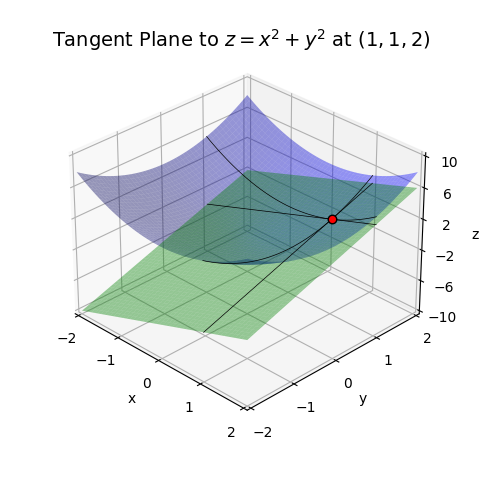

In [5]:
#| fig-align: center
f = lambda x, y: x**2 + y**2
dfdx = lambda x, y: (2 * x, 2 * y)

a = b = 1

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

f_tangent = lambda x, y: dfdx(a, b)[0] * (x - a) + dfdx(a, b)[1] * (y - b) + f(a, b)

plot_function_3d(x, y, [f, f_tangent], labelpad=5, ticks_every=[1, 1, 4], dist=12, figsize=(6, 6),
                 xlim=(-2, 2), ylim=(-2, 2), zlim=(-10, 10), elev=30, azim=-45,
                 points=[(a, b, f(a, b))], colors=['blue', 'green'], alpha=0.4,
                 curves = [(x, 0 * x + b, f(x, b**2)), 
                           (0 * y + a, y, f(a**2, y)),
                           (x, 0 * x + b, f_tangent(x, b**2)),
                           (0 * y + a, y, f_tangent(a**2, y))
                          ],
                 title=f'Tangent Plane to $z=x^2+y^2$ at ${(1, 1, 2)}$', titlepad=0)

As long as we're near the point $(a,b)$, the function $z=f(x,y)$ is well approximated by its tangent plane. Said differently, we've managed to **linearize** the function near the point $(a,b)$. As long as $(x,y)$ is close to $(a,b)$, we can for all practical purposes pretend the point is on the tangent plane. Anytime you see a plane or a line like this, you should immediately think linear algebra. Indeed, we're on the cusp of seeing where calculus and linear algebra meet.

## The Gradient

So far we've talked about partial derivatives and total differentials, but we've yet to talk about a *total derivative*. Let's look again at the formula for the total differential,

$$dz = \frac{\partial z}{\partial x}dx + \frac{\partial z}{\partial y}dy.$$

What would it even mean in this case to talk about a derivative as a ratio of total differentials? To make headway here we should step back and stare at this equation. If you look carefully, you'll see this equation is screaming at us to use vector notation. It kind of looks like a dot product between two vectors.

If we define the following two vectors in the plane,

$$d\mathbf{x} = (dx, dy), \quad \mathbf{g} = \mathbf{g}(\mathbf{x}) = \bigg(\frac{\partial z}{\partial x}, \frac{\partial z}{\partial y}\bigg),$$

then we can write the total differential as the dot product $dz = \mathbf{g} \cdot d\mathbf{x}$. Notice the analogy between this equation and the one for the univariate differential $dy = \frac{dy}{dx} dx$. Evidently, the vector $\mathbf{g}$ acts like some kind of vector derivative. It's called the **gradient vector**, or usually just the **gradient**. By abusing notation a little bit, we'll sometimes write the gradient as a ratio of differentials by pretending we can divide by $d\mathbf{x}$,

$$\frac{dz}{d\mathbf{x}} = \mathbf{g} = \bigg(\frac{\partial z}{\partial x}, \frac{\partial z}{\partial y}\bigg),$$

Doing this makes it obvious that we can go back and forth between the total differential $dz$ and the gradient $\mathbf{g}$ by "multiplying" both sides by $d\mathbf{x}$.

Another popular notation for the gradient is to use the *del* operator $\nabla$ to write the gradient as $\nabla z$ or $\nabla f(\mathbf{x})$. I personally prefer to avoid this notation in most cases since, on top of introducing yet another strange symbol, $\nabla z$ doesn't much help you remember what it is or what it does.

This new vector derivative suggests we should step back and think about multivariate calculus from the point of view of vectors instead of multiple variables. Instead of imagining a bivariate function as a function of the form $z = f(x,y)$, let's instead imagine it as a vector input function $z = f(\mathbf{x})$, where $\mathbf{x} = (x, y)$ is a vector in the plane. It means exactly the same thing, except we're now overloading the same function $z=f(\cdot)$ to map 2-dimensional *vector* inputs $\mathbf{x}$ to *scalar* outputs $z$.

Let's work a couple of examples. Take the quadratic function $z = x^2 + y^2$ again. We already showed its two partials are $2x$ and $2y$. Putting these into a vector gives the gradient, $\mathbf{g} = (2x, 2y)$. It's interesting to think about this example in terms of vectors. Notice that this quadratic function is just the squared norm of $\mathbf{x}$,

$$z = x^2 + y^2 = \mathbf{x} \cdot \mathbf{x} = ||\mathbf{x}||^2.$$

What we've evidently just shown is the gradient of the squared norm $z = ||\mathbf{x}||^2$ is $\mathbf{g} = 2\mathbf{x}$. Notice how similar this looks to the scalar case, where the derivative of $y=x^2$ is $\frac{dy}{dx} = 2x$.

Now let's take the function $z = ax + by$. This is easy. The gradient is just $\mathbf{g} = (a, b)$. Again, what's more interesting is thinking in terms of vectors. Let $\mathbf{a} = (a,b)$. Then we can write $z = \mathbf{a} \cdot \mathbf{x}$. What we've just shown then is the gradient of $\mathbf{a} \cdot \mathbf{x}$ is just $\mathbf{a}$. Again, compare with the scalar case, where the derivative of $y=ax$ is just $\frac{dy}{dx} = a$.

You can use sympy to compute gradients in a couple different ways. One way is just to calculate each of the partial derivatives one-by-one like I did before. Another way is to define a matrix symbol and take its derivative. Here's an example of how to do this using the previous example.

In [6]:
x = sp.MatrixSymbol('x', 2, 1)
a = sp.MatrixSymbol('a', 2, 1)

z = a.T @ x
grad = z.diff(x)
print(f'z = {z}')
print(f'g = {grad}')

z = a.T*x
g = a


To compute the gradient numerically, we just need to compute all the partial derivatives and put them into a vector. Since I already wrote two functions `diff_x` and `diff_y` to calculate the partial derivatives, all we need to do is call those two functions and put the outputs in a vector. I'll create a function called `diff(f, x, y, dx, dy)` to do this. When we get more into vector notation I'll clean it up a little so it generalizes to higher dimensions.

I'll again use the example of $z = x^2 + y^2$ to calculate the gradient numerically at the point $(1,1)$. Again, nothing special here. We're just putting the partial derivatives in a vector and returning it.

In [7]:
def grad(f, x, y, dx=1e-5, dy=1e-5):
    dzdx = diff_x(f, x, y, dx)
    dzdy = diff_y(f, x, y, dy)
    gradient = np.array([dzdx, dzdy])
    return gradient
    
f = lambda x, y: x**2 + y**2

gradient = grad(f, 1, 1)
print(f'g = {gradient}')

g = [2.00001 2.00001]


We can also write the tangent plane equation in vector notation. If $\mathbf{a} = (a,b)$ and $\mathbf{x} \approx \mathbf{a}$, then the tangent plane of $z=f(\mathbf{x})$ at $\mathbf{a}$ is given by

$$f(\mathbf{x}) \approx f(\mathbf{a}) + \mathbf{g}(\mathbf{a})^\top (\mathbf{x} - \mathbf{a}).$$

The notation $\mathbf{g}(\mathbf{a})$ just means to take the gradient and evaluate it at $\mathbf{x} = \mathbf{a}$. From this point of view we can think of the gradient as a *linear map* that maps vector differences $d\mathbf{x} \approx (\mathbf{x} - \mathbf{a})$ to scalar differences $dz \approx f(\mathbf{x}) - f(\mathbf{a})$.

Now, consider again an arbitrary function $z = f(\mathbf{x})$. Suppose we perturbed the input $\mathbf{x}$ in some arbitrary direction by an amount $d\mathbf{x}$. This would have to change the output $z$ by an amount

$$dz = f(\mathbf{x} + d\mathbf{x}) - f(\mathbf{x}).$$

But I just showed this same change is given by the dot product of the gradient vector $\mathbf{g}$ with $d\mathbf{x}$,

$$dz = \mathbf{g} \cdot d\mathbf{x}.$$

This suggests a way to define the gradient as a kind of ratio of differentials. Notice that by factoring out its norm we can write the differential vector $d\mathbf{x}$ as a scalar times a unit vector in the $d\mathbf{x}$ direction,

$$d\mathbf{x} = ||d\mathbf{x}|| \mathbf{e}_{dx}.$$

If we divide both sides of the total differential by the scalar norm $||d\mathbf{x}||$, we evidently get

$$\mathbf{g} \cdot \mathbf{e}_{dx} = \frac{dz}{||d\mathbf{x}||} = \frac{f(\mathbf{x} + d\mathbf{x}) - f(\mathbf{x})}{||d\mathbf{x}||}.$$

Said differently, the *projection* of the gradient $\mathbf{g}$ in the direction of $d\mathbf{x}$ is just the ratio of the total differential over the norm of $d\mathbf{x}$. This projection is sometimes called the **directional derivative** of $z$ in the direction of $d\mathbf{x}$. The directional derivative is what we get if we ask, "What is the partial derivative of a function along an arbitrary line in the plane, not necessarily the x or y axes?" If $\mathbf{e_u}$ is any unit vector, the directional derivative in the $u$-direction is just

$$\frac{\partial z}{\partial u} = \mathbf{g} \cdot \mathbf{e}_u.$$

The main reason I bring up the directional derivative is because it gives us a useful way to interpret the gradient graphically. Recall we can write the dot product of any two vectors in terms of the angle between them. If $\theta$ is the angle between the vectors $\mathbf{g}$ and $\mathbf{e}_u$, we evidently have

$$\frac{\partial z}{\partial u} = ||\mathbf{g}|| \cdot ||\mathbf{e}_u|| \cos\theta = ||\mathbf{g}|| \cos\theta.$$

The right-hand side will be highest when $\cos\theta = 1$, which occurs when $\mathbf{g}$ is parallel with $\mathbf{e}_u$. This means the directional derivative will be highest when it's pointing in the same direction as the gradient. Since derivatives are slopes, saying the directional derivative is highest in the direction of the gradient is the same thing as saying the slope of the curve is steepest in that direction. That is, the gradient points in the direction of *steepest ascent* of $z=f(\mathbf{x})$, i.e. the direction that's sloping up the fastest at a given point.

For example, take the quadratic $z = x^2 + y^2$ again. Its gradient is $\mathbf{g} = (2x, 2y)$. Which way does this point? Well, since $\mathbf{g} = 2\mathbf{x}$, it clearly points in the direction of $\mathbf{x}$. That's radially outward from the origin. If we look at the plot of this surface again, it's clear that the function is increasing steepest as we move radially outward at any given point.

Here's a plot of this function again, but showing the gradient at the point $(1,1)$ as a red vector. Notice how the arrow is pointing radially outward from the point, or "up the bowl".

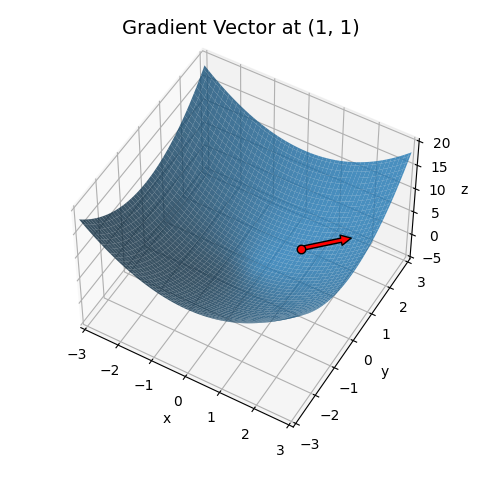

In [8]:
#| fig-align: center
f = lambda x, y: x**2 + y**2
dfdx = lambda x, y: (2 * x, 2 * y)

a, b = 1, 1
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

f_tangent = lambda x, y: 2 * a * (x - a) + 2 * b * (y - b) + 2
gradient = dfdx(a, b)

# plot_tangent_plane(x, y, a, b, f, f_tangent, dfdx, plot_grad=True, grad_scale=2, title=f'')
plot_function_3d(x, y, f, labelpad=5, ticks_every=[1, 1, 5], dist=12, figsize=(6, 6),
                 xlim=(-3, 3), ylim=(-3, 3), zlim=(-5, 20), elev=50, azim=-60, titlepad=10,
                 points=[(a, b, f(a, b))], title=f'Gradient Vector at {(a, b)}', alpha=0.8,
                 # curves = [(x, 0 * x + b, f(x, b**2)), (0 * y + a, y, f(a**2, y))],
                 arrows=[[[a, b, f(a, b)], [gradient[0] / 2, gradient[1] / 2, 0]]])

This may be easier to visualize if we look at the contour plot instead. Here's the contour plot of the same surface, shown in blue. The tangent plane contours are shown in green. The gradient at $(1,1)$ is the red vector. The interesting thing to notice here is that the gradient is pointing *perpendicular* to the contour lines of both the surface and the tangent plane. 

If you think about the contour plot as a topographical map, following the gradient vector at each point would take you upward along the steepest possible path, probably *not* what you want if you're a hiker, but it's definitely what you want if you're trying to get to the peak of a surface as quickly as possible.

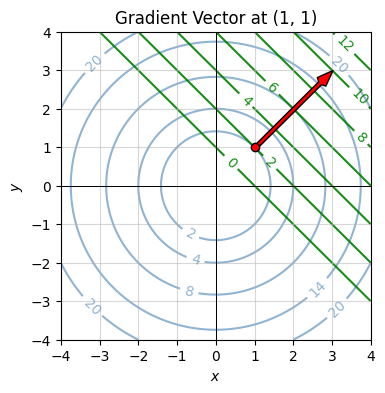

In [9]:
#| fig-align: center
f = lambda x, y: x**2 + y**2
dfdx = lambda x, y: (2 * x, 2 * y)

a, b = 1, 1
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)

f_tangent = lambda x, y: 2 * a * (x - a) + 2 * b * (y - b) + 2
gradient = dfdx(a, b)
levels = [[2, 4, 8, 14, 20], [0, 2, 4, 6, 8, 10, 12]]
colors = [['steelblue'] * len(levels), ['green']]
plot_contour(x, y, [f, f_tangent], points=[(a, b)], arrows=[[(a, b), (gradient[0], gradient[1])]], figsize=(4, 4),
             ticks_every=[1, 1], show_clabels=True, alphas=[0.6, 0.9], colors=colors, levels=levels,
             title=f'Gradient Vector at {(a, b)}')

Since the gradient can be thought of as a vector-valued function that maps vectors $\mathbf{x}$ to new vectors $\mathbf{g}$, we can also think of the gradient as a vector field. Here's a vector field plot of the gradient of $z=x^2 + y^2$ for different choices of $\mathbf{x}$. Notice how all the gradients are pointing outwards. This follows from the fact that $\mathbf{g} = 2\mathbf{x}$ for this function. The arrows are also getting bigger the further we get away from the origin. If you follow any flow of arrows, you'll move in the direction of steepest ascent.

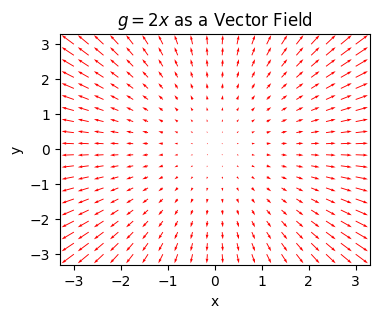

In [10]:
#| fig-align: center
plot_vector_field(dfdx, xlim=(-3, 3), ylim=(-3, 3), n_points=20, color='red', alpha=1,
                      scale=None, figsize=(4, 3), title=f'$g=2x$ as a Vector Field')

Notice something. Sense the gradient vectors all point up out of the bowl. The *negative* gradients must all point in the opposite direction, i.e. down into the bowl. If the positive gradient points in the direction of steepest *ascent*, then the negative gradient must point in the direction of steepest *descent*. Following the negative gradient takes you towards the bottom of the bowl as fast as possible. It's hard to overstate how important this fact is to machine learning. The fundamental optimizer used to train most machine learning models is *gradient descent*. I'll get back to this in a lot more detail in future lessons.

## The Hessian

In basic calculus we could also talk about derivatives of derivatives. The *second derivative* of a univariate function $y=f(x)$ is just the derivative of the derivative, i.e.

$$\frac{d^2 y}{dx^2} = \frac{d}{dx} \frac{dy}{dx}.$$

We can do the same thing in multivariate calculus, but we have to be careful about what we mean by *the* second derivative of a function.

Since partial derivatives are just univariate derivatives, we can take second partial derivatives in the usual way. The only difference is that we can now have *mixed partial derivatives*. If $z=f(x,y)$ is a bivariate function, it will have not $2$, but $2^2=4$ second partial derivatives,

$$\frac{\partial^2 z}{\partial x^2}, \quad \frac{\partial^2 z}{\partial x \partial y}, \quad \frac{\partial^2 z}{\partial y \partial x}, \quad \frac{\partial^2 z}{\partial y^2}.$$

To work an example, let's again look at the function

$$z = e^x \sin 5y - \frac{4y}{x}.$$

We already saw that the *first* partial derivatives are given by

$$
\frac{\partial z}{\partial x} = e^x \sin 5y + \frac{4y}{x^2}, \quad
\frac{\partial z}{\partial y} = 5e^x \cos 5y - \frac{4}{x}.
$$

We can get the *second* partial derivatives by differentiating both of these, each with respect to *both* $x$ and $y$,

\begin{align*}
\frac{\partial^2 z}{\partial x^2} &= \frac{\partial}{\partial x} \frac{\partial z}{\partial x} = e^x \sin 5y - \frac{8y}{x^3}, &
\frac{\partial^2 z}{\partial y \partial x} &= \frac{\partial}{\partial y} \frac{\partial z}{\partial x} = 5 e^x \cos 5y + \frac{4}{x^2}, \\
\frac{\partial^2 z}{\partial x \partial y} &= \frac{\partial}{\partial x} \frac{\partial z}{\partial y} = 5e^x \cos 5y + \frac{4}{x^2}, &
\frac{\partial^2 z}{\partial y^2} &= \frac{\partial}{\partial y} \frac{\partial z}{\partial y} = -25e^x \sin 5y.
\end{align*}

Of course, sympy can calculate these for you. For example, to calculate the mixed partial $\frac{\partial^2 z}{\partial y \partial x}$, just call `z.diff(x).diff(y)`. Notice how the ordering of the method call is backwards from the partial derivative notation. Be careful about that.

In [11]:
x, y = sp.symbols('x y')
z = sp.exp(x) * sp.sin(5 * y) - 4 * y / x

print(f'z = {z}')
print(f'∂∂z/∂x∂x = {z.diff(x).diff(x)}, \t ∂∂z/∂y∂x = {z.diff(y).diff(x)}')
print(f'∂∂z/∂x∂y = {z.diff(x).diff(y)}, \t ∂∂z/∂y∂y = {z.diff(y).diff(y)}')

z = exp(x)*sin(5*y) - 4*y/x
∂∂z/∂x∂x = exp(x)*sin(5*y) - 8*y/x**3, 	 ∂∂z/∂y∂x = 5*exp(x)*cos(5*y) + 4/x**2
∂∂z/∂x∂y = 5*exp(x)*cos(5*y) + 4/x**2, 	 ∂∂z/∂y∂y = -25*exp(x)*sin(5*y)


I laid the second partials in this example out as a $2 \times 2$ grid on purpose to suggest that we should probably organize them into a $2 \times 2$ matrix. This matrix is called the **Hessian matrix**, or just the **Hessian** for short. I'll denote it by the symbol $\mathbf{H}$,

$$
\mathbf{H} = \mathbf{H}(\mathbf{x}) = 
\begin{pmatrix} 
\frac{\partial^2 z}{\partial x^2} & \frac{\partial^2 z}{\partial y \partial x} \\
\frac{\partial^2 z}{\partial x \partial y} & \frac{\partial^2 z}{\partial y^2}
\end{pmatrix}.
$$

In the previous example the Hessian matrix turned out to be

$$
\mathbf{H} = 
\begin{pmatrix} 
e^x \sin 5y - \frac{8y}{x^3} & 5 e^x \cos 5y + \frac{4}{x^2} \\
5 e^x \cos 5y + \frac{4}{x^2} & -25e^x \sin 5y \\
\end{pmatrix}.
$$

If you stare at the off diagonals of this example, you'll see this matrix is *symmetric*, i.e. $\mathbf{H}^\top = \mathbf{H}$. This is a more or less general fact. As long as the second partial derivatives are all continuous, their Hessian matrix will be symmetric. This will generally be the case for us in practice.

To calculate the Hessian numerically, we'd need to calculate all the second partial derivatives and put them into a matrix. Here's the simplest way one might do this for a bivariate function. The function I'll use looks just like the one for the gradient, except now we need to take derivatives twice. I'll use it to calculate the Hessian of the quadratic $z = x^2 + y^2$ at the point $(1,1)$. The exact answer should be $\mathbf{H} = \text{diag}(2, 2)$. Taking both $dx$ and $dy$ to be `1e-4`, to within an error of around `1e-4` the answer seems right.

In [12]:
def hessian(f, x, y, dx=1e-4, dy=1e-4):
    dfdx = lambda x, y: diff_x(f, x, y, dx)
    dfdy = lambda x, y: diff_y(f, x, y, dy)
    d2zdx2 = diff_x(dfdx, x, y, dx)
    d2zdxdy = diff_x(dfdy, x, y, dx)
    d2zdydx = diff_y(dfdx, x, y, dy)
    d2zdy2 = diff_y(dfdy, x, y, dy)
    hess = np.array([[d2zdx2, d2zdydx], [d2zdxdy, d2zdy2]])
    return hess
    
f = lambda x, y: x**2 + y**2
hess = hessian(f, 1, 1)
print(f'H = \n{hess}')

H = 
[[1.99999999 0.        ]
 [0.         1.99999999]]


It may not be completely obvious, but the Hessian is indeed the multivariate generalization of the second derivative. I'll show why in the next section. Because of this, I'll sometimes denote the Hessian by pretending we can divide by $d\mathbf{x}^2$ and writing

$$\frac{d^2 z}{d\mathbf{x}^2} = \mathbf{H}.$$

Since we have the first and second derivatives now, we can talk about the *second-order* approximation of a function. If $z = f(\mathbf{x})$, and $\mathbf{x}$ is close to some vector $\mathbf{a}$, then the function's best quadratic approximation is given by

$$f(\mathbf{x}) \approx f(\mathbf{a}) + \mathbf{g}(\mathbf{a})^\top (\mathbf{x} - \mathbf{a}) + \frac{1}{2}(\mathbf{x} - \mathbf{a})^\top \mathbf{H}(\mathbf{a}) (\mathbf{x} - \mathbf{a}).$$

Remember, $\mathbf{g}(\mathbf{a})$ and $\mathbf{H}(\mathbf{a})$ mean, take the gradient and Hessian and evaluate them at the point $\mathbf{a}$. This means they'll be arrays of numbers, not arrays of functions. Instead of a plane, this approximation will try to approximate the function near $\mathbf{a}$ with a quadratic surface. The interesting thing in the multivariate case is that a quadratic surface need not even be bowl-shaped. We can also have quadratic surfaces that look like a **saddle**, for example

$$z = x^2 - y^2.$$

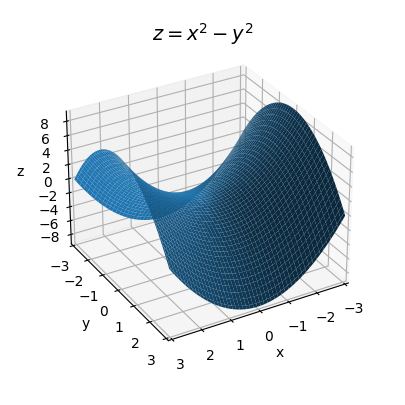

In [13]:
#| fig-align: center
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
f = lambda x, y: x**2 - y**2

plot_function_3d(x, y, f, title='$z=x^2-y^2$', titlepad=0, labelpad=5, ticks_every=[1, 1, 2], dist=12,
                 figsize=(6, 5), elev=30, azim=60)

The presence of the quadratic form $(\mathbf{x} - \mathbf{a})^\top \mathbf{H}(\mathbf{a}) (\mathbf{x} - \mathbf{a})$ should suggest what's going on here. Recall that a quadratic form is closely related to the *eigenvalues* of a matrix. In particular, the *sign* of the eigenvalues say something about the sign of the quadratic form. In the scalar case, the *sign* of $h$ in an expression like $(x-a)h(x-a) = h \cdot (x-a)^2$ says whether the quadratic will bowl upwards of downwards. In that case there are only two possibilities, the function will bowl up or down. In the *bivariate* case there are now three depending on the sign of the eigenvalues of $\mathbf{H}(\mathbf{a})$:

1. Both eigenvalues are positive: In this case, $\mathbf{H}(\mathbf{a})$ is positive definite. This means the quadratic surface will be an upward bowl shape. The prototypical example of this kind of quadratic is $z = x^2 + y^2$.
2. Both eigenvalues are negative: In this case, $\mathbf{H}(\mathbf{a})$ is negative definite. This means the quadratic surface will be a downward bowl shape. The prototypical example of this kind of quadratic is $z = -(x^2 + y^2)$.
3. One eigenvalue is positive, the other is negative: In this case, $\mathbf{H}(\mathbf{a})$ is neither, or indefinite. This means the quadratic surface will be a saddle shape. The prototypical examples of this kind of quadratic are $z = x^2 - y^2$ or $z = -x^2 + y^2$.
4. One of the eigenvalues is zero: In this case, we can't say much about what the function is doing at $\mathbf{a}$ using only a quadratic approximation. We'd have to consider higher order terms to get an idea.

Usually, which of the three cases we fall into depends on the choice of the point $\mathbf{a}$. For one choice of $\mathbf{a}$, $\mathbf{H}(\mathbf{a})$ might be positive definite. For another it might be negative definite. For another it might be indefinite. For some simple functions though, the sign of the eigenvalues *don't* depend on $\mathbf{a}$. These types of functions are special.

If $\mathbf{H}(\mathbf{a})$ is positive semi-definite for any point $\mathbf{a}$, we'd say the function $z=f(\mathbf{x})$ is a **convex function**. Convex functions will always look more or less like upward-sloping bowls. Similarly, if $\mathbf{H}(\mathbf{a})$ is negative semi-definite for all points $\mathbf{a}$, we'd say the function $z=f(\mathbf{x})$ is a **concave function**. Concave functions will always look more or less like downward-sloping bowls.

As an example, consider again the quadratic function $z = x^2 + y^2$. The Hessian of this simple function is just

$$
\mathbf{H} = 
\begin{pmatrix} 
2 & 0 \\
0 & 2 \\
\end{pmatrix} = 2 \mathbf{I}.
$$

This means its two eigenvalues are both $\lambda = 2 > 0$. Notice the Hessian doesn't depend on $x$ or $y$ at all. It's constant. Taken together, this means $\mathbf{H}$ is positive definite for all $\mathbf{x}$, and so the function $z = x^2 + y^2$ is a convex function.

As another example, suppose we instead had $z = -(x^2 + y^2)$. In that case, we'd have

$$
\mathbf{H} = 
\begin{pmatrix} 
-2 & 0 \\
0 & -2 \\
\end{pmatrix} = -2 \mathbf{I},
$$

so both eigenvalues are $\lambda = -2 < 0$. Again, the Hessian is constant, which in this case means $\mathbf{H}$ is negative definite for all $\mathbf{x}$. Thus, $z = -(x^2+y^2)$ is a concave function. Notice that this is just the negative of the previous example. In fact, the negative of any convex function will be concave, and vice versa, since negating a function just flips the signs of the Hessian's eigenvalues.

As a final example, suppose we had $z = x^2 - y^2$. In that case, we'd have

$$
\mathbf{H} = 
\begin{pmatrix} 
2 & 0 \\
0 & -2 \\
\end{pmatrix} = \text{diag}(2, -2).
$$

The eigenvalues in this case are the diagonal entries, $\lambda = 2, -2$. Again, the Hessian is constant, but the eigenvalues have different signs, which means $\mathbf{H}$ is *indefinite* for all $\mathbf{x}$. This function is thus neither convex nor concave.

If you like, you can use sympy to calculate these eigenvectors for you. Here's a sympy calculations of the eigenvalues from the previous example. Of course, this is overkill in this case since the eigenvalues of a diagonal matrix are just the diagonal entries, but it will do it anyway.

In [14]:
H = sp.Matrix([[2, 0], [0, -2]])
eigs = H.eigenvals()
print(f'eigenvalues = {list(eigs.keys())}')

eigenvalues = [2, -2]


## The Jacobian

When it comes to differentiation, we've gone about as far as we can go with scalar-valued bivariate functions of the form $z = f(x, y)$. We'll now step up one level, not by going to three *input* variables as you might think, but by going to *two* output variables. That is, we'll consider *pairs* of bivariate functions

\begin{align*}
z &= f(x, y), \\
u &= g(x, y). \\
\end{align*}

Functions like this are called **vector-valued functions**. They output vector values instead of scalar values. To see why, let's write it in vector form by defining an input vector $\mathbf{x} = (x, y)$, an output vector $\mathbf{y} = (z, u)$, and a vector function $\mathbf{f}(\mathbf{x}) = \big(f(x,y), g(x,y) \big)$. Then we can write the pair of bivariate functions as

$$\mathbf{y} = \mathbf{f}(\mathbf{x}).$$

Here's an example of a vector-valued function,

\begin{align*}
z &= x^2 + y^2, \\
u &= e^{x + y}. \\
\end{align*}

We can also write it in vector notation as

$$
\mathbf{y} = 
\begin{pmatrix}
z \\
u \\
\end{pmatrix} = 
\begin{pmatrix}
x^2 + y^2 \\
e^{x + y} \\
\end{pmatrix} = 
\mathbf{f}(\mathbf{x}).
$$

We can try to visualize a vector-valued function, but it does start to get harder. When it's just a pair of bivariate functions, we can just visualize two surface in space. One will be the surface $z=f(x,y)$, the other the surface $u=g(x,y)$. Here's a plot for the above example. The blue surface is the same familiar bowl of $z = x^2 + y^2$. The orange surface is the 2D exponential $u = e^{x + y}$, which as you'd predict blows up fast when $x+y$ is positive.

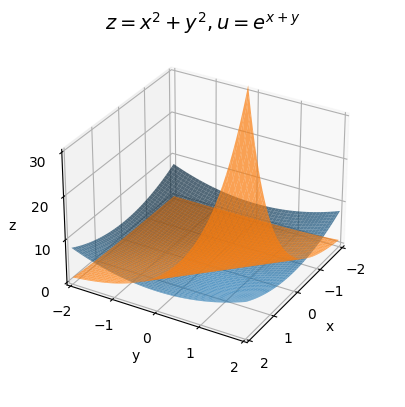

In [15]:
#| fig-align: center
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
f = lambda x, y: x**2 + y**2
g = lambda x, y: np.exp(x + y)

plot_function_3d(x, y, [f, g], title='$z=x^2+y^2, u=e^{x+y}$', titlepad=10, labelpad=5, alpha=0.7,
                 ticks_every=[1, 1, 10], dist=12, zlim=(0, 30), figsize=(6, 5))

For all practical purposes you can just treat these vector-valued functions as a pair of bivariate functions and operate on them one at a time. For example, we can take total differentials of $z$ and $u$ separately to get

\begin{align*}
dz &= \frac{\partial z}{\partial x}dx + \frac{\partial z}{\partial y} dy, \\
du &= \frac{\partial u}{\partial x}dx + \frac{\partial u}{\partial y} dy. \\
\end{align*}

Each of these functions also has its own gradient, namely

$$
\frac{dz}{d\mathbf{x}} = \bigg(\frac{\partial z}{\partial x}, \frac{\partial z}{\partial y} \bigg), \quad
\frac{du}{d\mathbf{x}} = \bigg(\frac{\partial u}{\partial x}, \frac{\partial u}{\partial y} \bigg).
$$

As you'd expect, using these gradients, we can write the total differentials as

\begin{align*}
dz &= \frac{dz}{d\mathbf{x}} \cdot d\mathbf{x}, \\
du &= \frac{du}{d\mathbf{x}} \cdot d\mathbf{x}. \\
\end{align*}

Now's where it gets more interesting. What do we mean by *the* derivative of a vector-valued function? It's evidently not just the gradient, because now we've got two of them, one for $z$ and one for $u$. But if you stare at the total differentials, you'll see that yet again we can stack things into arrays. If we can define,

$$
d\mathbf{y} = 
\begin{pmatrix}
dz \\
du \\
\end{pmatrix}, \quad
\mathbf{J} = \mathbf{J}(\mathbf{x}) = 
\bigg (\frac{dz}{d\mathbf{x}}, \frac{du}{d\mathbf{x}} \bigg ),
$$

then we should be able to write the total differentials as a single vector equation,

$$d\mathbf{y} = 
\begin{pmatrix}
dz \\
du \\
\end{pmatrix} = 
\begin{pmatrix}
\frac{dz}{d\mathbf{x}}^\top \\
\frac{du}{d\mathbf{x}}^\top \\
\end{pmatrix}
\begin{pmatrix}
dx \\
dy \\
\end{pmatrix} = 
\begin{pmatrix}
\frac{dz}{d\mathbf{x}}^\top d\mathbf{x} \\
\frac{du}{d\mathbf{x}}^\top d\mathbf{x} \\
\end{pmatrix} = 
\mathbf{J} d\mathbf{x}.$$

We do have to be careful though, because this time the array $\mathbf{J}$ is no longer a vector. It's a stack of two column vectors, namely the gradients of $z$ and $u$. This means $\mathbf{J}$ is a $2 \times 2$ *matrix*. It's called the **Jacobian matrix**, or just the **Jacobian**,

$$
\mathbf{J} = \mathbf{J}(\mathbf{x}) = 
\begin{pmatrix}
\frac{dz}{d\mathbf{x}}^\top \\
\frac{du}{d\mathbf{x}}^\top \\
\end{pmatrix} = 
\begin{pmatrix}
\frac{\partial z}{\partial x} & \frac{\partial z}{\partial y} \\
\frac{\partial u}{\partial x} & \frac{\partial u}{\partial y} \\
\end{pmatrix}.
$$

Let's do a quick example. Take the previous vector-valued function. In that case we'd have

$$
\mathbf{J}(\mathbf{x}) = 
\begin{pmatrix}
\frac{\partial z}{\partial x} & \frac{\partial u}{\partial x} \\
\frac{\partial z}{\partial y} & \frac{\partial u}{\partial y} \\
\end{pmatrix} = 
\begin{pmatrix}
2x & 2y \\
e^{x + y} & e^{x + y} \\
\end{pmatrix}.
$$

Notice from this example that unlike the Hessian of a scalar-valued function, the Jacobian is not symmetric $\mathbf{J}^\top \neq \mathbf{J}$. This will generally be the case. Why should it be? After all, $z=f(x,y)$ and $u=g(x,y)$ are two completely different functions.

Again, the total differential $d\mathbf{y} = \mathbf{J} d\mathbf{x}$ suggests that the Jacobian is *the* derivative of a vector-valued function. For this reason, I'll again pretend we can divide by $d\mathbf{x}$ and sometimes write the Jacobian as

$$\frac{d\mathbf{y}}{d\mathbf{x}} = \mathbf{J}.$$

Notice how this looks almost exactly like the old scalar derivative $\frac{dy}{dx}$. The only difference is that now both $\mathbf{y}$ and $\mathbf{x}$ are *vectors*, and their ratio is a *matrix*. As with the gradient, you can think of the Jacobian as a linear map, except this time it's a map from vectors to vectors. It sends input differential vectors $d\mathbf{x}$ to output differential vectors $d\mathbf{y} = \mathbf{J}d\mathbf{x}$.

Calculating the Jacobian numerically is again pretty easy. Just calculate the gradients of $z$ and $u$ separately and stack them into a matrix. Here's an example. I'll numerically calculate the Jacobian of the above example at the point $\mathbf{x} = (1,1)$.

In [16]:
def jacobian(f, g, x, y, dx=1e-5):
    grad_z = grad(f, x, y, dx=dx)
    grad_u = grad(g, x, y, dx=dx)
    jacob = np.vstack([grad_z, grad_u])
    return jacob
    
f = lambda x, y: x**2 + y**2
g = lambda x, y: np.exp(x + y)

a, b = 1, 1
jacob = jacobian(f, g, a, b)
print(f'J{a, b} = \n{jacob}')

J(1, 1) = 
[[2.00001    2.00001   ]
 [7.38909304 7.38909304]]


As with scalar-valued function $z = f(\mathbf{x})$, we can linearize a vector-valued function $\mathbf{y} = \mathbf{f}(\mathbf{x})$ about any point $\mathbf{a}$ provided $\mathbf{x}$ is near $\mathbf{a}$,

$$\mathbf{f}(\mathbf{x}) \approx \mathbf{f}(\mathbf{a}) + \mathbf{J}(\mathbf{a}) (\mathbf{x} - \mathbf{a}).$$

The result of linearization this time though won't be a tangent plane, but rather *two* tangent planes, one for each function. For example, with the previous function, linearizing near the point $\mathbf{a} = (1,1)$ would give

$$
\begin{pmatrix}
z \\
u \\
\end{pmatrix} \approx
\begin{pmatrix}
1^2 + 1^2 \\
e^{1+1} \\
\end{pmatrix} + 
\begin{pmatrix}
2 \cdot 1 & 2 \cdot 1 \\
e^{1 + 1} & e^{1 + 1} \\
\end{pmatrix}
\begin{pmatrix}
x-1 \\
y-1 \\
\end{pmatrix} = 
\begin{pmatrix}
2 + 2(x-1) + 2(y-1) \\
e^2 +  e^2(x-1) + e^2(y-1)\\
\end{pmatrix}.
$$

Let's look at one last example. Suppose we had a *scalar-valued* function $z = f(x,y)$. Then its *gradient* $\mathbf{g}(\mathbf{x})$ must itself be a *vector-valued* function, namely the function

$$
\mathbf{y} = \mathbf{g}(\mathbf{x}) = 
\begin{pmatrix}
\color{red}{\frac{\partial z}{\partial x}} \\
\color{blue}{\frac{\partial z}{\partial y}} \\
\end{pmatrix}.
$$

This means we can take the Jacobian of the gradient,

$$\mathbf{J}(\mathbf{x}) = \frac{d}{d\mathbf{x}} \mathbf{g}(\mathbf{x}) = 
\begin{pmatrix}
\frac{\partial}{\partial x}\color{red}{\frac{\partial z}{\partial x}} & \frac{\partial}{\partial y}\color{red}{\frac{\partial z}{\partial x}} \\
\frac{\partial}{\partial x}\color{blue}{\frac{\partial z}{\partial y}} & \frac{\partial}{\partial y}\color{blue}{\frac{\partial z}{\partial y}} \\
\end{pmatrix} = 
\begin{pmatrix}
\frac{\partial^2 z}{\partial x^2} & \frac{\partial^2 z}{\partial y \partial x} \\
\frac{\partial^2 z}{\partial x \partial y} & \frac{\partial^2 z}{\partial y^2} \\
\end{pmatrix} = \mathbf{H}(\mathbf{x}).
$$

That is, the Jacobian of the gradient is just the Hessian. This is the sense in which the Hessian is the multivariate generalization of the second derivative. What about the Hessian of a *vector-valued* function though? I haven't talked about that. It turns out that the Hessian in that case isn't a matrix anymore, but rather a *rank-3 tensor*. I'll talk more about those in a future lesson.

If you haven't noticed, multivariate calculus seems to come with its own confusing zoo of notation and terminology. Instead of just "derivatives", we now have "partial derivatives", "gradients", and "Jacobians". Instead of "second derivatives", we have "second partial derivatives" and "Hessians". Worse, there are a lot of different notations around to denote each of these things. All this stuff can be confusing. It's the way it is largely for historical reasons. In practice, people often are lazier about these things. In fact, in machine learning, people often refer to *any* first derivative as a *gradient*, and *any* second derivative as a *Hessian*.

## Differentiation Rules

Since partial differentials and derivatives are ordinary univariate derivatives, they naturally inherit all of the standard differentiation rules from ordinary calculus. I'll list the rules for the partial derivatives with respect to $x$, but they apply to $y$ too, as well as both partial differentials.

| <div style="width:200px"></div>| <div style="width:200px"></div>| <div style="width:400px"></div>|
|:---------|:---------|:------------|
| **Name** | **Rule** | **Example** |
| Linearity | $\frac{\partial}{\partial x}(au + bv) = a\frac{\partial u}{\partial x} + b\frac{\partial v}{\partial x}$ | $\frac{\partial}{\partial x}(2x^2 y + 5y^2\log x) = 2y\frac{\partial}{\partial x}x^2 + 5y^2\frac{\partial}{\partial x}\log x = 4xy + \frac{5y^2}{x}$ |
| Product Rule | $\frac{\partial}{\partial x}(uv)=u\frac{\partial v}{\partial x} + v\frac{\partial u}{\partial x}$ | $\frac{\partial}{\partial x}(x e^x \log y) = x \log y \frac{\partial}{\partial x}e^x + e^x \log y \frac{\partial}{\partial x} x = xe^x \log y + e^x \log y$ |
| Quotient Rule | $\frac{\partial}{\partial x}\big(\frac{u}{v}\big) = \frac{v\frac{\partial u}{\partial x}-u\frac{\partial v}{\partial x}}{v^2}$                      | $\frac{\partial}{\partial x} \frac{\cos x e^y}{x^2 + y} = \frac{(x^2+y)e^y\frac{\partial}{\partial x}\cos x-\cos x e^y \frac{\partial}{\partial x}(x^2+y)}{(x^2+y)^2} = \frac{-(x^2+y)e^y \sin x - 2x e^y \cos x}{(x^2+y)^2}$ |
| Chain Rule | $\frac{\partial z}{\partial x} = \frac{\partial z}{\partial w}\frac{\partial w}{\partial x}$ | $\frac{\partial}{\partial x} e^{\sin x} \log(10y) = \log(10y) \frac{\partial}{\partial w} e^w \frac{\partial}{\partial x}\sin x = e^{\sin x} \cos(x) \log(10y)$ |
| Inverse Rule | $\frac{\partial x}{\partial z} = \big(\frac{\partial z}{\partial x}\big)^{-1}$ | $z = 5x + y \quad \Longrightarrow \quad \frac{\partial x}{\partial z} = \big(\frac{\partial z}{\partial x}\big)^{-1} = \frac{1}{5}$ |

Each of these rules can be extended to gradients and Jacobians as well, with some modifications to account for the fact that we're now dealing with vectors and matrices instead of scalars. 

Linearity extends easily. Since vectors and matrices are linear objects, linearity extends right over with no modifications. For example, if $\mathbf{u}=\mathbf{f}(\mathbf{x})$ and $\mathbf{v}=\mathbf{g}(\mathbf{x})$ are two vector-valued functions, and $\mathbf{A}$ and $\mathbf{B}$ are two constant matrices with compatible shapes, then the Jacobian satisfies

$$\frac{d}{d\mathbf{x}} (\mathbf{A}\mathbf{u} + \mathbf{B}\mathbf{v}) = \mathbf{A}\frac{d\mathbf{u}}{d\mathbf{x}} + \mathbf{B}\frac{d\mathbf{v}}{d\mathbf{x}}.$$

The product rule carries over almost identically too, except we have to be careful about the order of multiplication since matrix multiplication doesn't commute. For example, the gradient of the dot product of two vector-valued functions is

$$\frac{d}{d\mathbf{x}} \mathbf{u} \cdot \mathbf{v} = \frac{d\mathbf{v}}{d\mathbf{x}} \mathbf{u} + \frac{d\mathbf{u}}{d\mathbf{x}} \mathbf{v}.$$

Since the gradient of a scalar is a vector, the right-hand side must be a vector, which means the derivatives (i.e. the Jacobian matrices) must go to the left of each vectors so that their product is a vector. 

The quotient rule doesn't really make sense for vector-valued functions since we're not allowed to divide vectors. For scalar-valued functions we're okay. For example, the gradient of $u=f(x,y)$ over $v=g(x,y)$ is given by

$$\frac{d}{d\mathbf{x}} \bigg(\frac{u}{v}\bigg) = \frac{1}{v^2} \bigg(v \frac{du}{d\mathbf{x}} - u\frac{dv}{d\mathbf{x}} \bigg).$$

Since the gradient of a scalar must be a vector, the right-hand side must be a vector. Indeed it is, since the two gradients $\frac{du}{d\mathbf{x}}$ and $\frac{dv}{d\mathbf{x}}$ are vectors.

The inverse rule involves dividing by a derivative. For a gradient that wouldn't make sense since we'd be dividing by a vector. For a Jacobian though it does make sense as long as the Jacobian is an invertible square matrix. For the $2 \times 2$ Jacobian I defined before, provided that we can invert $\mathbf{y} = \mathbf{f}(\mathbf{x})$, we'd have

$$\frac{d\mathbf{x}}{d\mathbf{y}} = \bigg(\frac{d\mathbf{y}}{d\mathbf{x}} \bigg)^{-1}.$$

The chain rule is important enough to machine learning that I want to talk about it in a little more detail. Suppose $z = f(x,y)$ is some function. In terms of its partial derivatives, its total differential is just

$$dz = \frac{\partial z}{\partial x} dx + \frac{\partial z}{\partial y} dy.$$

Suppose that $x$ and $y$ depend on some third variable $u$. Then we can find the total derivative $\frac{dz}{du}$ by dividing both sides of the total differential by $du$,

$$dz = \frac{\partial z}{\partial x} \frac{dx}{du} + \frac{\partial z}{\partial y} \frac{dy}{du}.$$

Suppose though that $x$ and $y$ depend on not only $u$, but also some other variable $v$. That is, $(x, y) = g(u, v)$. If we wanted to know the partial derivative of $z$ with respect to $u$, holding $v$ constant, all we'd need to do is convert $dz$ to $\partial z = \partial_u z$ and divide both sides by $\partial u$ to get

$$\frac{\partial z}{\partial u} = \frac{\partial z}{\partial x} \frac{\partial x}{\partial u} + \frac{\partial z}{\partial y} \frac{\partial y}{\partial u}.$$

Similarly, if we wanted to know the partial derivative of $z$ with respect to $v$, holding $u$ constant, we'd convert convert $dz$ to $\partial z = \partial_v z$ and divide by $\partial v$,

$$\frac{\partial z}{\partial v} = \frac{\partial z}{\partial x} \frac{\partial x}{\partial v} + \frac{\partial z}{\partial y} \frac{\partial y}{\partial v}.$$

We can express this in a cleaner notation by turning everything into vectors and matrices. If we let $\mathbf{x} = (x,y)$ and $\mathbf{u} = (u,v)$, then the partials $\frac{\partial z}{\partial u}$ and $\frac{\partial z}{\partial v}$ are just the gradient vector $\frac{dz}{d\mathbf{u}}$. The right-hand side is a matrix-vector product of the Jacobian matrix $\frac{d\mathbf{x}}{d\mathbf{u}}$ with the gradient vector $\frac{dz}{d\mathbf{x}}$. Again, we have to be careful about the order of multiplication by putting the matrix to the left. The chain rule in vector form is thus

$$\frac{dz}{d\mathbf{u}} = \frac{d\mathbf{x}}{d\mathbf{u}} \frac{dz}{d\mathbf{x}}.$$

What about if on top of all this $\mathbf{u}$ was a vector-valued function of some other vector $\mathbf{w}$, and we wanted to know the gradient $\frac{dz}{d\mathbf{w}}$? No problem. We just need to include another Jacobian matrix $\frac{d\mathbf{u}}{d\mathbf{w}}$. Now, of course, we run into an issue of which order to multiply the two Jacobian matrices. It turns out we should multiply any new Jacobian matrices on the *left*, so we'd have

$$\frac{dz}{d\mathbf{w}} = \frac{d\mathbf{u}}{d\mathbf{w}} \frac{d\mathbf{x}}{d\mathbf{u}} \frac{dz}{d\mathbf{x}}.$$

This can be extended, or *chained*, as many times as we'd like. Suppose we had some complicated scalar-valued function of $L+1$ compositions

\begin{align*}
\mathbf{a}_1 &= \mathbf{f}_1(\mathbf{x}), \\
\mathbf{a}_2 &= \mathbf{f}_2(\mathbf{a}_1), \\
\vdots & \qquad \vdots \\
\mathbf{a}_{L-1} &= \mathbf{f}_{L-1}(\mathbf{a}_{L-2}) \\
\mathbf{y} &= \mathbf{f}_L(\mathbf{a}_{L-1}). \\
z &= g(\mathbf{y}). \\
\end{align*}

Then the multivariate chain rule would say

$$\frac{dz}{d\mathbf{x}} =  \frac{d\mathbf{a}_1}{d\mathbf{x}} \frac{d\mathbf{a}_2}{d\mathbf{a}_1} \cdots \frac{d\mathbf{a}_{L-1}}{d\mathbf{a}_{L-2}} \frac{d\mathbf{y}}{d\mathbf{a}_{L-1}} \frac{dz}{d\mathbf{y}}.$$

It may not be at all obvious, but I've essentially just outlined for you how you'd derive the important **backpropagation** algorithm of deep learning. Of course, this was just done for bivariate functions, but it extends to functions of arbitrary dimension as well, even when each of the $\mathbf{f}(\mathbf{a})$ are different sizes. The only real difference is that with neural networks we'd think of each function $\mathbf{f}(\mathbf{a})$ as a *layer* in a *neural network*, which is just a complicated function composition that maps inputs $\mathbf{x}$ to outputs $\mathbf{y} = \mathbf{f}_L(\mathbf{a}_{L-1})$. The scalar-valued function $z = g(\mathbf{y})$ is the *loss function*, which measures how good $\mathbf{y}$ is at predicting the *true output* in the data. By calculating the gradient $\frac{dz}{d\mathbf{x}}$ and using it to move in the direction of steepest descent we can minimize the loss by updating the parameters in the network until we've hit the minimum, roughly speaking.

Backpropagation gives a much more efficient way to calculate the gradient of a long chain of composite functions than using ordinary numerical differentiation. The reason is we're able to use information from the later gradients to help compute the earlier gradients, which saves on computation. In general, using the chain rule to calculate the gradient of a scalar-valued function like this is called **autodifferentiation**. This is how deep learning frameworks like Pytorch or Tensorflow or Jax calculate gradients.

I'll close up this section by listing out some of the gradients and Jacobians we might be interested in in machine learning. Don't try to memorize these. Just look them over and keep them in mind for later reference.

| <div style="width:200px"></div>| <div style="width:250px"></div>| <div style="width:250px"></div>|
| --- | --- | --- |
| **Name** | **Derivative** | **Scalar Equivalent** |
| Linearity (scalar-valued) | $\frac{d}{d\mathbf{x}}(au + bv) = a\frac{du}{d\mathbf{x}} + b\frac{dv}{d\mathbf{x}}$ | $\frac{d}{dx}(au + bv) = a\frac{du}{dx} + b\frac{dv}{dx}$ |
| Linearity (vector-valued) | $\frac{d}{d\mathbf{x}}(\mathbf{A}\mathbf{u} + \mathbf{B}\mathbf{v}) = \mathbf{A}\frac{d\mathbf{u}}{d\mathbf{x}} + \mathbf{B}\frac{d\mathbf{v}}{d\mathbf{x}}$ | $\frac{d}{dx}(au + bv) = a\frac{du}{dx} + b\frac{dv}{dx}$ |
| Product Rule (scalar-valued) | $\frac{d}{d\mathbf{x}}(uv) = u\frac{dv}{d\mathbf{x}} + v\frac{du}{d\mathbf{x}}$ | $\frac{d}{dx}(uv) = u\frac{dv}{dx} + v\frac{du}{dx}$ |
| Product Rule (dot products) | $\frac{d}{d\mathbf{x}}(\mathbf{u}^\top \mathbf{v}) = \mathbf{u}^\top \frac{d\mathbf{v}}{d\mathbf{x}} + \mathbf{v}^\top \frac{d\mathbf{u}}{d\mathbf{x}}$ | $\frac{d}{dx}(uv) = u\frac{dv}{dx} + v\frac{du}{dx}$ |
| Chain Rule (both scalar-valued) | $\frac{dz}{d\mathbf{x}} = \frac{dz}{dy} \frac{dy}{d\mathbf{x}}$ | $\frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx}$ |
| Chain Rule (scalar-valued, vector-valued) | $\frac{dz}{d\mathbf{x}} = \big(\frac{dz}{d\mathbf{y}}\big)^\top \frac{d\mathbf{y}}{d\mathbf{x}}$ | $\frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx}$ |
| Chain Rule (both vector-valued) | $\frac{d\mathbf{z}}{d\mathbf{x}} = \frac{d\mathbf{z}}{d\mathbf{y}} \frac{d\mathbf{y}}{d\mathbf{x}}$ | $\frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx}$ |
| Constant Function (scalar-valued) | $\frac{d}{d\mathbf{x}} c = 0$ | $\frac{d}{dx} c = 0$ |
| Constant Function (vector-valued) | $\frac{d}{d\mathbf{x}} \mathbf{c} = \mathbf{0}$ | $\frac{d}{dx} c = 0$ |
| Squared Two-Norm | $\frac{d}{d\mathbf{x}} ||\mathbf{x}||_2^2 = \frac{d}{d\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2 \mathbf{x}$ | $\frac{d}{dx} x^2 = 2x$ |
| Linear Combination | $\frac{d}{d\mathbf{x}} \mathbf{c}^\top \mathbf{x} = \mathbf{c}$ | $\frac{d}{dx} cx = c$ |
| Symmetric Quadratic Form | $\frac{d}{d\mathbf{x}} \mathbf{x}^\top \mathbf{S} \mathbf{x} = 2 \mathbf{S} \mathbf{x}$ | $\frac{d}{dx} sx^2 = 2sx$ |
| Affine Function | $\frac{d}{d\mathbf{x}} (\mathbf{A}\mathbf{x} + \mathbf{b})  = \mathbf{A}^\top$ or $\frac{d}{d\mathbf{x}} (\mathbf{x}^\top \mathbf{A} + \mathbf{b})  = \mathbf{A}$ | $\frac{d}{dx} (ax+b) = a$ |
| Squared Error Function | $\frac{d}{d\mathbf{x}} ||\mathbf{A}\mathbf{x}-\mathbf{b}||_2^2 = 2\mathbf{A}^\top (\mathbf{A}\mathbf{x}-\mathbf{b})$ | $\frac{d}{dx} (ax-b)^2 = 2a(ax-b)$ |
| Cross Entropy Function | $\frac{d}{d\mathbf{x}} (-\mathbf{c}^\top \log \mathbf{x}) = -\frac{\mathbf{c}}{\mathbf{x}}$ (element-wise division) | $\frac{d}{dx} (-c \log x) = -\frac{c}{x}$ |
| ReLU Function | $\frac{d}{d\mathbf{x}} \max(\mathbf{0}, \mathbf{x}) = \text{diag}(\mathbf{x} \geq \mathbf{0})$ (element-wise $\geq$) | $\frac{d}{dx} \max(0, x) = \text{$1$ if $x \geq 0$ else $0$}$ |
| Softmax Function | $\frac{d}{d\mathbf{x}} \text{softmax}(\mathbf{x}) = \text{diag}(\mathbf{y}) - \mathbf{y} \mathbf{y}^\top$ where $\mathbf{y} = \text{softmax}(\mathbf{x})$ | |

You *can* calculate gradients and Jacobians in sympy, though in my opinion it can be kind of painful except in the simplest cases. Here's an example, where I'll calculate the Jacobian of the squared error function $||\mathbf{A}\mathbf{x}-\mathbf{b}||_2^2$.

**Aside:** There is also a nice online [tool](https://www.matrixcalculus.org/) that lets you do this somewhat more easily.

In [17]:
m = sp.Symbol('m')
n = sp.Symbol('n')
A = sp.MatrixSymbol('A', m, n)
x = sp.MatrixSymbol('x', n, 1)
b = sp.MatrixSymbol('b', m, 1)

y = (A * x - b).T * (A * x - b)
gradient = y.diff(x)
print(f'dy/dx = gradient')

dy/dx = gradient


## Volume Integration

So far I've only really talked about how to *differentiate* of bivariate functions. I've said nothing about how to *integrate* them. Indeed, for machine learning purposes differentiation is far more important to know in detail than integration is. Just as multivariate functions have different kinds of differentials and derivatives, they have different kinds of integrals as well. There are volume integrals, line integrals, surface integrals, and so on. For now I'll focus only on volume integrals. These come up when dealing with multivariate probability distributions, as we'll see later. This choice to skip other types of integration means I'll be skipping over a lot of fundamental facts of vector calculus that aren't as relevant in machine learning.

Let's begin by recalling how we defined the integral of a univariate function $y = f(x)$. We defined the (definite) integral as the (signed) area under the curve of $f(x)$ in the region $a \leq x \leq b$. We did this by approximating the exact area with the area of a bunch of rectangles of height $f(x_n)$ and width $dx$. The area became exact as we allowed the number of rectangles $N$ to become infinitely large and their widths $dx = \frac{b-a}{N}$ to become infinitesimally small in proportion,

$$A = \int_a^b f(x) dx = \sum_{n=0}^{N-1} f(x_n) dx.$$

To calculate these areas efficiently we introduced the Fundamental Theorem of Calculus. This said that, provided we can find a function $F(x)$ whose derivative is the original function $f(x)$, then the area under the curve is given by

$$\int_a^b f(x) dx = F(b) - F(a).$$

Let's now try to extend these ideas to bivariate functions. With bivariate functions, we'll no longer be talking about
the *area under a curve*, but instead about the *volume under a surface*. We'll approximate the volume under a surface not with *rectangles*, but with *rectangular prisms*. Instead of integrating between two endpoints, we'll instead have to integrate over a two-dimensional *region* in the xy-plane.

Suppose we want to calculate the *volume* under the surface of $z = f(x, y)$ inside of some region $(x, y) \in R$. The region could be any shape in the xy-plane. It could be a rectangle, a circle, a figure eight, whatever. What we'll imagine breaking the region $R$ up into a bunch of little rectangles of width $dx$ and height $dy$. Each little rectangle will evidently have an area of $dA = dx \cdot dy$. Clearly, if we add up the area of all these little rectangles, we just get the area of the region $R$. When $dA$ is infinitesimal, this is an integral for the area $A$,

$$A = \int_R dA = \int_R dx dy.$$

Great, but this just gives us the *area* of the region $(x, y) \in R$ in the plane. What we wanted was the *volume* under the surface of $z = f(x, y)$ in 3D space. Here's how we can get that. Take one of the tiny rectangle areas $dA$ and multiply it by the value of the function evaluated at any point $(x_n, y_m)$ inside that rectangle. This will give the volume $dV = f(x_n, y_m) dA$ of a *rectangular prism* whose base is $dA$ and whose height is $f(x_n, y_m)$. To get the total volume under the surface, just add all these up. Provided $dA$ is infinitesimal, the total volume $V$ will be given by an integral,

$$V = \int_R f(x, y) dA = \sum_{n=0}^{N-1}\sum_{m=0}^{M-1} f(x_n, y_m) dA.$$

This integral is called the **volume integral** of $z = f(x, y)$ over the region $R$. It's just the sum of the volume of a bunch of infinitely thin rectangular prisms.

Here's an example so you can better see what's going on. I'll approximate the volume under the surface of $z = x^2 + y^2$ inside the region $R = [0,1]^2$. That is, inside the region where $0 \leq x \leq 1$ and $0 \leq y \leq 1$. This region is called the *unit square*. I'll approximate the volume using $N \cdot M = 10 \cdot 10 = 100$ rectangular prisms each of base area $dA = 0.1 \cdot 0.1 = 0.01$. The pink surface is the surface itself and the rectangular prisms are shown in blue.

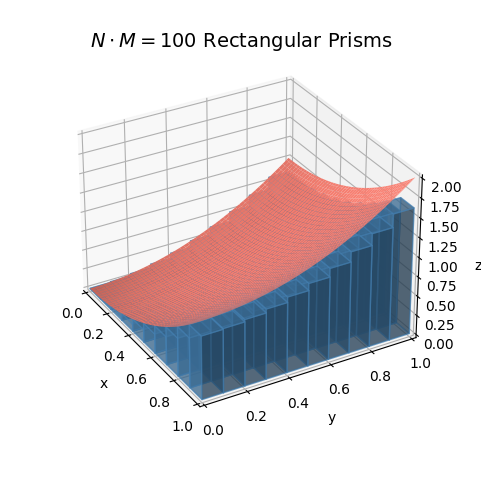

In [18]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
f = lambda x, y: x**2 + y**2
plot_approximating_prisms(x, y, f, dx=0.1, dy=0.1, azim=-30, elev=30, dist=12, figsize=(6, 6), titlepad=0, 
                          labelpad=8, ticks_every=None, title='$N\cdot M=100$ Rectangular Prisms')

It looks like the approximate volume from this calculation is about $V \approx 0.57$. It's hard to know at this moment how close this is to the true value, but based on the plot it seems we may be underestimating the true volume a little bit. We'll come back to this in a second.

The area $dA$ is called the **area element**. Since $dA = dxdy$, we can also write the volume integral as

$$\int_R f(x, y) dA = \iint_R f(x, y) dx dy.$$

Notice the use of one integral sign on the left, and two on the right. This is saying more than it looks like. On the left, we're doing a single integral for the area $A$. On the right we're doing a *double integral*, first over $x$, then over $y$. From this point on I'll only focus on the case when $R = [a, b] \times [c, d]$ is a *rectangle*. That is, $a \leq x \leq b$ and $c \leq y \leq d$. In that case, we can write the the double integral as

$$\int_{[a, b] \times [c, d]} f(x, y) dA = \int_c^d \bigg( \int_a^b f(x, y) dx \bigg) dy.$$

Notice that the right-hand side is just two univariate integrals, an inside integral over $x$ from $x=a$ to $x=b$, and then an outside integral over $y$ from $y=c$ to $y=d$. This gives us a way to actually calculate the volume under a surface. We first do the inner integral over $x$, treating $y$ as constant, and then do the outer integral over $y$ to get a numerical value for $V$. For each univariate integral all the usual integration rules apply.

Let's see if we can calculate the exact volume under the example in the above plot, namely the quadratic function $z = x^2 + y^2$ on the unit square $R = [0,1]^2$. To make it clear which integral is which, I'll highlight the $x$ integral and variables in blue, and the $y$ integral and variables in red. We have,

\begin{align*}
V &= \int_{[0,1]^2} (\color{steelblue}{x^2} \color{black}{+} \color{red}{y^2}\color{black}{) dA} \\
&= \color{red}{\int_0^1} \color{black}{\bigg(}\color{steelblue}{\int_0^1} (\color{steelblue}{x^2} \color{black}{+} \color{red}{y^2}) \color{steelblue}{dx} \color{black}{\bigg)} \color{red}{dy} \\
&= \color{red}{\int_0^1} \color{black}{\bigg[}\frac{1}{3} \color{steelblue}{x^3} \color{black}{+} \color{steelblue}{x}\color{red}{y^2} \color{black}{\bigg]}_{\color{steelblue}{x=0}}^{\color{steelblue}{x=1}} \color{red}{dy} \\
&= \color{red}{\int_0^1} \color{black}{\bigg(\frac{1}{3}} + \color{red}{y^2} \color{black}{\bigg)} \color{red}{dy} \\
&= \color{black}{\bigg[\frac{1}{3}}\color{red}{y} \color{black}{+ \frac{1}{3}} \color{red}{y^3} \color{black}{\bigg]}_{\color{red}{y=0}}^{\color{red}{y=1}} \\
&= \color{black}{\frac{2}{3} \approx 0.667.} \\
\end{align*}

Evidently, the *exact* volume under the surface $z = x^2 + y^2$ on the unit square is just $V = \frac{2}{3} \approx 0.667$. It seems like our approximation from before was indeed underestimating the true volume a decent bit. Here's how to calculate the same volume integral with sympy. To integrate $z = f(x,y)$ over a rectangle $[a,b] \times [c,d]$, use the command `sp.integrate(z, (x, a, b), (y, c, d))`. Note the integral will be calculated in the order you specify.

In [19]:
x, y = sp.symbols('x y')
z = x**2 + y**2
volume = sp.integrate(z, (x, 0, 1), (y, 0, 1))
print(f'V = {volume}')

V = 2/3


Numerically integrating a volume integral is similar to the way it was for an area integral. We need to define a grid of points $(x_n, y_m)$, use those to get the prisms heights $f(x_n, y_m)$, multiply those heights by $dA = dx \cdot dy$ to get the volume of the rectangular prisms, and then sum all the volumes up to get the full volume. In general, such an algorithm will run in $O(N \cdot M)$ time and have a $\mathcal{O}(dx \cdot dy)$ error.

In the example below I'll calculate the same example volume integral using `dx=1e-4` and `dy=1e-4`. That implies there will be 

$$N \cdot M = \frac{b-a}{dx} \cdot \frac{d-c}{dy} = 10^4 \cdot 10^4 = 10^8$$

total subregions we'll need to calculate the prism volumes of and then sum over. As you can see, this is already a pretty huge number which will make even this simple calculation run pretty slow. You can imagine how much worse it'll get for higher-dimensional integrals. In fact, we'd almost never want to calculate volume integrals this way. There are better ways to do it, for example via random sampling schemes like [Monte-Carlo integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration).

In [20]:
def integrate(f, a, b, c, d, dx=1e-4, dy=1e-4):
    N = int((b - a) / dx)
    M = int((d - c) / dy)
    dA = dx * dy
    x_range = np.linspace(a + dx/2, b - dx/2, N)
    y_range = np.linspace(c + dy/2, d - dy/2, M)
    X, Y = np.meshgrid(x_range, y_range)
    Z = f(X, Y)
    prisms = Z * dA
    integral = np.sum(prisms)
    return integral


f = lambda x, y: x**2 + y**2
a, b = 0, 1
c, d = 0, 1
volume = integrate(f, a, b, c, d)
print(f'V = {volume}')

V = 0.6666666650000003


The volume integral inherits the same linearity property that the area integral. We can break it up over sums and factor out any multiplied constants,

$$\int_{R} \big(a f(x, y) + b g(x, y)\big) dA = a \int_{R} f(x, y) dA + b \int_{R} g(x, y) dA.$$

Just like we could split a univariate integral up by breaking the integration region $[a,b]$ into pieces, we can do the same thing with volume integrals by breaking the region $R$ up into pieces. If we break $R$ up into two non-overlapping subregions $R_1$ and $R_2$, we can write

$$\int_{R} f(x,y) dA = \int_{R_1} f(x,y) dA + \int_{R_2} f(x,y) dA.$$

As long as one of the function inside the volume integral doesn't blow up when integrated with respect to $x$ or $y$ we can swap the integrals and get the same answer for the volume. For a rectangular region, this just says

$$\int_{[a, b] \times [c, d]} f(x, y) dA = \int_c^d \bigg( \int_a^b f(x, y) dx \bigg) dy = \int_a^b \bigg( \int_c^d f(x, y) dy \bigg) dx.$$

This makes sense, as a double integral is really just a double sum, and we can swap the order of sums as long as the values inside the sum don't blow up.

Recall that for a univariate function $y = f(x)$, we could change variables by letting $x = g(u)$ and integrating over $u$,

$$\int f(x) dx = \int f(g(u)) \frac{dx}{du} du.$$

We can do something similar for a bivariate function $z = f(x,y)$. Suppose we found it difficult to integrate this function with respect to $x$ and $y$. What we could do is try to find two other variables $u$ and $v$ that make things easier to integrate. Suppose they're related via some vector-valued function $(x, y) = g(u, v)$ or in vector notation $\mathbf{x} = g(\mathbf{u})$. We'd like to be able to write something like

$$f(\mathbf{x}) = f(g(\mathbf{u})) \cdot \frac{d\mathbf{x}}{d\mathbf{u}},$$

but this isn't quite right. The left-hand side is a scalar, while the right-hand side is a matrix since it's multiplying a Jacobian. It turns out the *right* thing to do is multiply not by the Jacobian, but by the absolute value of its *determinant*,

$$f(\mathbf{x}) = f(g(\mathbf{u})) \cdot \bigg | \det \bigg(\frac{d\mathbf{x}}{d\mathbf{u}} \bigg) \bigg | = f(g(\mathbf{u})) \cdot \big|\det(\mathbf{J})\big|.$$

Using this rule we can integrate over a region $R$ by instead integrating over its transformed region $g^{-1}(R) = \{ u, v : (x, y) = g(u, v) \}$,

$$\int_R f(x, y) dxdy = \int_{g^{-1}(R)} f\big(g(u,v)\big) \cdot \big|\det(\mathbf{J})\big| \ du dv.$$

This trick is particularly useful when $R$ is some complicated non-rectangular region in $xy$-space, but we can easily find a transformation $(x, y) = g(u, v)$ that makes $g^{-1}(R)$ rectangular in $uv$-space. The formula $dA = \big|\det(\mathbf{J})\big| \ du dv$ is in fact the most general form of the area element we can write down.

A classic example of a change of variables is "proving" that the area of a circle of radius $s$ is $A = 2\pi s$. Suppose we wanted to find the *area* inside the circle $R = \{x, y : x^2 + y^2 = s^2 \}$. If we just let $f(x,y) = 1$, we can get this area $A$ by doing a volume integral,

$$A = \int_R dA = \iint_R dx dy.$$

This would be pretty complicated to do in $xy$ coordinates, but there's a change of variables we can do to make this integral super easy, namely *polar coordinates*. Define a transformation function $(x, y) = g(r, \theta)$ by

$$x = r \cos \theta, \quad y = r \sin \theta.$$

We require that $r \geq 0$ and $0 \leq \theta \leq 2\pi$. It may not be obvious, but this is a valid invertible function. You can go back and forth between $(x,y)$ and $(r,\theta)$ for every point except the origin. This follows from the fact that $r$ just represents the distance of $(x,y)$ from the origin, and $\theta$ represents the angle between the vector $\mathbf{x} = (x,y)$ and the $x$ basis vector $\mathbf{e}_x = (1,0)$.

Anyway, the Jacobian of this transformation is given by taking all the partial derivatives of $\mathbf{x} = g(\mathbf{u})$,

$$\mathbf{J} = 
\begin{pmatrix}
\frac{\partial x}{\partial r} & \frac{\partial y}{\partial r} \\
\frac{\partial x}{\partial \theta} & \frac{\partial y}{\partial \theta} \\
\end{pmatrix} = 
\begin{pmatrix}
\cos\theta & \sin\theta \\
-r\sin\theta & r\cos\theta \\
\end{pmatrix} \quad \Longrightarrow \quad
\big|\det(\mathbf{J})\big| = \big | r\cos^2 \theta + r\sin^2 \theta \big | = r.
$$

Here I just used the trig identity $\cos^2 \theta + \sin^2 \theta = 1$. Evidently, I've shown that the area element in polar coordinates is given by

$$dA = dx dy = r dr d\theta.$$

Now, to do the integration we need to figure out what $g^{-1}(R)$ is. Here let's use some intuition. Since $r$ represents a radius, and we're trying to find the area inside a circle of radius $s$, it seems like $r$ should run from $0$ to $s$. Since $\theta$ is an angle, to sweep over the area of a whole circle we should let the angle go all the way around, from $0^\circ$ to $360^\circ$. In radians that means $\theta$ goes from $0$ to $2\pi$. 

Thus, we finally have the integral in polar coordinates. The integration is pretty easy. Since $f(x,y)=1$, we can just break this up into a product of independent integrals, one over $r$, and the other one over $\theta$. The area of a circle of radius $s$ is thus given by

$$A = \int_R dA = \int_0^{2\pi} \bigg(\int_0^s r dr \bigg) d\theta = \bigg(\int_0^s r dr \bigg) \bigg(\int_0^{2\pi} d\theta \bigg) = \frac{1}{2} r^2 \ \bigg |_{r=0}^s \cdot \theta \ \bigg |_{\theta = 0}^{2\pi} = 2\pi s.$$

Unfortunately, symbolic packages like sympy aren't usually smart enough to recognize and perform a change of variables on their own. That's an insight you usually have to do yourself before integrating. Once you've found a good change of variables, you can plug and chug as usual in the new variable system.

In [21]:
r, theta, s = sp.symbols('r theta s')
area = sp.integrate(1, (r, 0, s), (theta, 0, 2 * sp.pi))
print(f'A = {area}')

A = 2*pi*s


## Calculus In Higher Dimensions

Yet again, it may seem like very little I've said would generalize the dimensions higher than two, but in fact almost all of it does. I was careful to formulate the language in a way so that it would, particularly by using vector notation where I could. The main difference, again, is that with higher dimensional functions we can't easily visualize what's going on anymore.

Suppose we have a scalar-valued function $z = f(x_0, x_1, \cdots, x_{n-1})$ that depends on $n$ input variables $x_0, x_1, \cdots, x_{n-1}$. We can also think of this as a vector-input function by defining $\mathbf{x} = (x_0, x_1, \cdots, x_{n-1})$ and writing $z = f(\mathbf{x})$. Now, suppose we nudge one of the $x_i$ by some infinitesimal amount $\partial x_i = d x_i$. Then $z = f(\mathbf{x})$ will get nudged by an amount

$$\partial_i z = f(x_0, x_1, \cdots, x_i + \partial x_i, \cdots, x_{n-1}) - f(x_0, x_1, \cdots, x_i, \cdots, x_{n-1}).$$

This is called the **partial differential** of $z = f(\mathbf{x})$ with respect to $x_i$. Notice all we did was nudge $x_i$ by a tiny amount $\partial x_i$. All the other variables stayed fixed, hence the term "partial". This expression looks kind of messy. We can write it more compactly using vector notation by noting that $\mathbf{x} + \partial x_i \mathbf{e}_i$ is the vector whose components are $x_0, x_1, \cdots, x_i + \partial x_i, \cdots, x_{n-1}$. Then we just have

$$\partial_i z = f(\mathbf{x} + \partial x_i \mathbf{e}_i) - f(\mathbf{x}).$$

If we divide both sides by $\partial x_i$ we get the **partial derivative** of the function with respect to $x_i$,

$$\frac{\partial z}{\partial x_i} = \frac{f(\mathbf{x} + \partial x_i \mathbf{e}_i) - f(\mathbf{x})}{\partial x_i} = \frac{f(x_0, x_1, \cdots, x_i + \partial x_i, \cdots, x_{n-1}) - f(x_0, x_1, \cdots, x_i, \cdots, x_{n-1})}{\partial x_i}.$$

In general we want to know how $z$ changes when all the inputs are arbitrarily changed, not how $z$ changes when only a single variable changes. Suppose $\mathbf{x}$ is changed by some size $n$ infinitesimal vector $d\mathbf{x} = (dx_0, dx_1, \cdots, dx_{n-1})$. Then evidently $z = f(\mathbf{x})$ would change by an amount

$$dz = f(\mathbf{x} + d\mathbf{x}) - f(\mathbf{x}) = f(x_0 + dx_0, x_1 + dx_1, \cdots, x_{n-1} + dx_{n-1}) - f(x_0, x_1, \cdots, x_{n-1}).$$

This is called the **total differential** of $z$ with respect to $\mathbf{x}$. By the same logic we used for bivariate functions, the total differential also turns out to be a sum over all its partial differentials,

$$dz = \sum_{i=0}^{n-1} \partial_i z = \partial_0 z + \partial_1 z + \cdots + \partial_{n-1} z.$$

This of course means that we can also write the total differential as a sum over the partial derivatives,

$$dz = \sum_{i=0}^{n-1} \frac{\partial z}{\partial x_i} dx_i = \frac{\partial z}{\partial x_0} dx_0 + \frac{\partial z}{\partial x_1} dx_1 + \cdots + \frac{\partial z}{\partial x_{n-1}} dx_{n-1}.$$

We can write everything in vector notation by defining a vector of size $n$ called the **gradient vector**,

$$\frac{dz}{d\mathbf{x}} = \mathbf{g}(\mathbf{x}) = \bigg(\frac{\partial z}{\partial x_0}, \frac{\partial z}{\partial x_1}, \cdots, \frac{\partial z}{\partial x_{n-1}} \bigg).$$

The gradient vector is again the multivariate generalization of the total derivative, at least for scalar-valued functions. We can again write the total differential as a dot product of the gradient vector with the differential $d\mathbf{x}$,

$$dz = \frac{dz}{d\mathbf{x}} \cdot d\mathbf{x} = \mathbf{g} \cdot d\mathbf{x}.$$

This equation gives us a geometric interpretation of the gradient by defining a kind of $n$-dimensional version of the tangent plane, called a **tangent hyperplane**. It's an $n$-dimensional hyperplane in $n+1$ dimensional space. The tangent hyperplane to the function at a point $\mathbf{a}$ is given by setting the differential $d\mathbf{x} = \mathbf{x} - \mathbf{a}$ and solving for $f(\mathbf{x})$ to get

$$f(\mathbf{x}) \approx f(\mathbf{a}) + \mathbf{g}(\mathbf{a})^\top (\mathbf{x} - \mathbf{a}).$$

Don't even try to visualize this. It's just a conceptual thing. You can think of the tangent hyperplane as a *best affine approximation* to the function at the point $\mathbf{a}$. It's the hyperplane that just touches tangent to the point $f(\mathbf{a})$ in $n+1$ dimensional space.

The gradient vector $\mathbf{g}(\mathbf{a})$ again points in the direction of *steepest ascent* of the function at the point $\mathbf{x} = \mathbf{a}$. You can think of this as following from the fact that along contours of constant $z$ we must have $dz = 0$, which implies that $\mathbf{g}$ must be *orthogonal* to any infinitesimal changes $d\mathbf{x}$ along the contour. Of course, in higher-dimensions, a contour is *really* any $n$-dimensional surface of constant $z$.

We can generalize the *second* derivative to higher dimensions as well by looking at the matrix of all partial derivatives of $z = f(\mathbf{x})$. Since there are $n$ variables, there will be $n^2$ possible second partials, most of which will be *mixed* partials. In all cases we'd care about the order of the mixed partials doesn't matter. That is, partial derivatives *commute*. For example, the second partial with respect to $x_i$ and $x_j$ can be found by any of the following,

$$\frac{\partial^2 z}{\partial x_i \partial x_j} = \frac{\partial}{\partial x_i} \frac{\partial z}{\partial x_j} = \frac{\partial}{\partial x_j} \frac{\partial z}{\partial x_i} = \frac{\partial^2 z}{\partial x_j \partial x_i}.$$

Putting all of these second partials into a matrix gives the $n \times n$ matrix we call the **Hessian**,

$$
\frac{d^2z}{d\mathbf{x}^2} = \mathbf{H}(\mathbf{x}) = 
\begin{pmatrix} 
\frac{\partial^2 z}{\partial x_0^2} & \frac{\partial^2 z}{\partial x_1 \partial x_0} & \cdots & \frac{\partial^2 z}{\partial x_{n-1} \partial x_0} \\ 
\frac{\partial^2 z}{\partial x_0 \partial x_1} & \frac{\partial^2 z}{\partial x_1^2} & \cdots & \frac{\partial^2 z}{\partial x_{n-1} \partial x_1} \\ 
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 z}{\partial x_0 \partial x_{n-1}} & \frac{\partial^2 z}{\partial x_1 \partial x_{n-1}} & \cdots & \frac{\partial^2 z}{\partial x_{n-1}^2}
\end{pmatrix}.
$$

Since the second partials all commute, the Hessian will be symmetric, $\mathbf{H}^\top = \mathbf{H}$. The Hessian is the multivariate generalization of the second derivative in the sense that it's the *Jacobian* of the *gradient*. As with any $n \times n$ symmetric matrix, the Hessian is guaranteed to have $n$ real eigenvalues $\lambda_0, \lambda_1, \cdots, \lambda_{n-1}$. The sign of these $n$ eigenvalues tells you the *curvature* of the function at a point. This follows from the **second-order approximation** to the function at a point $\mathbf{a}$, given by

$$f(\mathbf{x}) \approx f(\mathbf{a}) + \mathbf{g}(\mathbf{a})^\top (\mathbf{x} - \mathbf{a}) + \frac{1}{2}(\mathbf{x} - \mathbf{a})^\top \mathbf{H}(\mathbf{a}) (\mathbf{x} - \mathbf{a}).$$

Geometrically, you can think of this function as defining a kind of hyper quadratic function. The term $(\mathbf{x} - \mathbf{a})^\top \mathbf{H}(\mathbf{a}) (\mathbf{x} - \mathbf{a})$ is a quadratic form that determines the shape of this quadratic function. The sign of the eigenvalues tells you which directions will slope downwards and which will slope upwards. 

If the eigenvalues are all positive then $\mathbf{H}(\mathbf{a})$ will be positive definite, and the quadratic will bowl upwards. A function where $\mathbf{H}(\mathbf{a})$ is positive definite for *all* $\mathbf{a} \in \mathbb{R}^n$ is called a **convex function**. Convex functions are very special to machine learning and optimization in general since, as we'll see later, they have a unique global minimum, and there are very reliably efficient algorithms to find this minimum.

If the eigenvalues are all negative then $\mathbf{H}(\mathbf{a})$ will be negative definite, and the quadratic will bowl downwards. Up to a minus sign, convex and concave functions are basically the same things, since if $f(\mathbf{x})$ is convex, then $-f(\mathbf{x})$ will be concave, and vice versa. Just as convex functions have a unique global minimum, concave functions have a unique global maximum. Outside of these two cases the eigenvalues will have mixed signs. Then, the function is called a **non-convex function**. Non-convex functions can bowl upwards in some directions and downward in others, like a saddle, except in $n$ dimensions it can bowl downwards or upwards in multiple directions.

Thus far we've considered scalar-valued functions. Of course, we can consider vector-valued functions as well. Suppose we have a function $\mathbf{y} = f(\mathbf{x})$ that maps $n$ inputs $\mathbf{x} = (x_0, x_1, \cdots, x_{n-1})$ inputs to $m$ outputs $\mathbf{y} = (y_0, y_1, \cdots, y_{n-1})$. Note that we need not require $m=n$. We can have as many inputs as we like and as many outputs as we like. We can again think of each output $y_j$ as a scalar-valued function that has a gradient $\mathbf{g}_j$. Putting all of these gradients into a matrix defines the $m \times n$ **Jacobian matrix**,

$$
\frac{d\mathbf{y}}{d\mathbf{x}} = \mathbf{J}(\mathbf{x}) = 
\begin{pmatrix} 
\frac{\partial y_0}{\partial x_0} & \frac{\partial y_0}{\partial x_1} & \cdots & \frac{\partial y_0}{\partial x_{n-1}} \\ 
\frac{\partial y_1}{\partial x_0} & \frac{\partial y_1}{\partial x_1} & \cdots & \frac{\partial y_1}{\partial x_{n-1}} \\ 
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial y_{m-1}}{\partial x_0} & \frac{\partial y_{m-1}}{\partial x_1} & \cdots & \frac{\partial y_{m-1}}{\partial x_{n-1}}
\end{pmatrix}.
$$

The Jacobian matrix is the most general multivariate generalization of the ordinary derivative. It just generalizes the gradient to vector-valued functions. Notice that in general the Jacobian won't even be a square matrix, much less symmetric. The total differential for a vector-valued function $\mathbf{y} = f(\mathbf{x})$ can be written in the usual way by using matrix-vector multiplication,

$$d\mathbf{y} = \frac{d\mathbf{y}}{d\mathbf{x}} d\mathbf{x} = \mathbf{J} d\mathbf{x}.$$

Evidently, the Jacobian can be thought of as a *linear map* that maps $n$-dimensional differential vectors $d\mathbf{x}$ to $m$-dimensional vectors $d\mathbf{y}$. As with the gradient, we can use the Jacobian to create an *affine approximation* to the function at a point $\mathbf{a}$,

$$f(\mathbf{x}) \approx f(\mathbf{a}) + \mathbf{J}(\mathbf{a}) (\mathbf{x} - \mathbf{a}).$$

Instead of defining a single $n$-dimensional hyperplane, this function will define $m$ such hyperplanes at once, one for each component of $\mathbf{y}$.

All of the differentiation rules given for bivariate functions carry over into higher dimensions as well. Higher-dimensional gradients and Jacobians satisfy their own versions of linearity, the product rule, the chain rule, and the inverse and quotient rules. Again, we have to keep in mind the compatibility of dimensions when figuring out which way to order terms.

Here are some functions to calculate partial derivatives, the gradient, the Jacobian, and the Hessian for higher-dimensional functions. I'll fill this in more later...

In [22]:
def diff(f, x, i, dx=1e-5):
    # O(n) time, O(dx) convergence
    e = np.zeros(len(x))
    e[i] = 1
    dzdxi = (f(x + dx * e) - f(x)) / dx
    return dzdxi

def grad(f, x, dx=1e-5):
    # O(n^2) time, O(n * dx) convergence
    n = len(x)
    partials = [diff(f, x, i, dx=dx) for i in range(n)]
    return np.array(partials)

def jacobian(f, x, dx=1e-5):
    # O(m * n^2) time, O(m * n * dx) convergence
    m = len(f)
    grads = [grad(f[j], x, dx=dx) for j in range(m)]
    jacob = np.vstack(grads)
    return jacob

def hessian(f, x, dx=1e-4):
    # O(n^3) time, O(n^2 * dx^2) convergence
    grad_fn = lambda x: grad(f, x, y, dx=dx)
    hess = jacob(grad_fn, x, dx=dx)
    return hess

Finally, we can generalize the volume integral to higher dimensions as well. Now though, $z = f(x_0,x_1,\cdots,x_{n-1})$ defines an $n$-dimensional **hypersurface** in $n+1$ dimensional space, and we seek to calculate the **hypervolume** under this hypersurface over an $n$-dimensional region $R$. We proceed by trying to approximate this hypervolume by using *hyperrectangles* with infinitesimal base **hyperarea** $dA = dx_0 dx_1 \cdots dx_{n-1}$ and heights $f(x_0,x_1,\cdots,x_{n-1})$. Each of these hyperrectangles will have an infinitesimal hypervolume $dV = f(x_0,x_1,\cdots,x_{n-1}) dA$.

If we partition the region $R$ into a grid of points and calculate the hypervolumes of each of these points and sum them all up, we get the hypervolume $V$ under the function, which we call the **hypervolume integral** of $f(x_0,x_1,\cdots,x_{n-1})$ over $R$,

$$V = \int_{R} f(x_0,x_1,\cdots,x_{n-1}) \ dA = \sum_{\text{all hyperrectangles}} f(x_0,x_1,\cdots,x_{n-1}) \ dA.$$

When the region $R = [a_0, b_0] \times [a_1, b_1] \times \cdots \times [a_{n-1}, b_{n-1}]$, the region itself is a hyperrectangle. In that case, we can break up the hypervolume integral into a sequence of iterated univariate integrals,

$$\int_{R} f(x_0,x_1,\cdots,x_{n-1}) \ dA = \int_{a_0}^{b_0} \int_{a_1}^{b_1} \cdots \int_{a_{n-1}}^{b_{n-1}} f(x_0,\cdots,x_{n-1}) \ dx_0dx_1\cdots dx_{n-1}.$$

As with ordinary volume integrals, we'd do these from the inside out. Provided the function doesn't blow up inside the region we can write the sequence of integrals in any order and get the same answer. All of the rules for the bivariate integral I mentioned extend to these hypervolume integrals as well. The only real difference is we're now integrating over $n$ variables, not just two.

I won't bother including code to numerical integrate these higher-dimensional hypervolume integrals since they'd be ungodly slow to calculate. In practice, methods like Monte Carlo integration are used to calculate these integrals when $n$ is bigger than like 2 or 3.